In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
save_path_208Tl_13bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/HPR/208Tl/summary_208Tl.h4'
save_path_208Tl_5bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/summary_208Tl.h4'
save_path_208Tl_13bar_toy = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/HPR/toy_prod/toy_208Tl/toy_summary_208Tl.h4'

In [3]:
info_df_208Tl_13bar = pd.read_hdf(save_path_208Tl_13bar, 'events_info')
sim_evs_info_13bar = pd.read_hdf(save_path_208Tl_13bar, 'sim_info')
info_df_208Tl_5bar = pd.read_hdf(save_path_208Tl_5bar, 'events_info')
sim_evs_info_5bar = pd.read_hdf(save_path_208Tl_5bar, 'sim_info')

info_df_208Tl_13bar_toy = pd.read_hdf(save_path_208Tl_13bar_toy, 'events_info')
sim_evs_info_13bar_toy = pd.read_hdf(save_path_208Tl_13bar_toy, 'sim_info')

In [4]:
#eff total (sin corte a 0.4MeV, hecho con el toy)
len(info_df_208Tl_13bar_toy) / sim_evs_info_13bar_toy.prod(axis=1)

0    0.280365
dtype: float64

In [5]:
def print_effs(df, sim_evs_df, e_threshold = (0.4, np.inf)):
    nevents_per_port = sim_evs_df.sim_evs_per_file.values * sim_evs_df.sim_files_per_port.values
    nevents_total = nevents_per_port * sim_evs_df.n_ports.values

    df = df[(df.tot_ene > e_threshold[0]) & (df.tot_ene < e_threshold[1])]
    port_eff = df.groupby('port').size() / nevents_per_port
                                                         
    print('MC efficiencies ({:.4f} < E < {:.4f} MeV)'.format(e_threshold[0], e_threshold[1]))
    print('Nsim events      = {}'.format(nevents_total[0]))
    #print('Nsaved events    = {}'.format(len(df)))
    print('Total efficiency = {}'.format(len(df) / nevents_total[0]))
    print('')
    print('Nsim events per port = {}'.format(nevents_per_port[0]))
    #print('Nsaved events per port:')
    #print(df.groupby('port').size())
    print('Efficiencies:')
    print(port_eff)

    return port_eff

In [6]:
eff_13bar = print_effs(info_df_208Tl_13bar, sim_evs_info_13bar)

MC efficiencies (0.4000 < E < inf MeV)
Nsim events      = 52800000
Total efficiency = 0.08422217803030303

Nsim events per port = 13200000
Efficiencies:
port
PORT_1a    0.093867
PORT_1b    0.090218
PORT_2a    0.064778
PORT_2b    0.088027
dtype: float64


In [7]:
eff_5bar = print_effs(info_df_208Tl_5bar, sim_evs_info_5bar)

MC efficiencies (0.4000 < E < inf MeV)
Nsim events      = 12000000
Total efficiency = 0.030617

Nsim events per port = 3000000
Efficiencies:
port
PORT_1a    0.033872
PORT_1b    0.032640
PORT_2a    0.023862
PORT_2b    0.032094
dtype: float64


Double scape peak: 1592 keV

Photopeak: 2615 keV

In [8]:
_ = print_effs(info_df_208Tl_13bar, sim_evs_info_13bar, e_threshold = (1.592 - 0.005, 1.592 + 0.005))

MC efficiencies (1.5870 < E < 1.5970 MeV)
Nsim events      = 52800000
Total efficiency = 0.0014443181818181818

Nsim events per port = 13200000
Efficiencies:
port
PORT_1a    0.001543
PORT_1b    0.001495
PORT_2a    0.001226
PORT_2b    0.001513
dtype: float64


In [9]:
_ = print_effs(info_df_208Tl_5bar, sim_evs_info_5bar, e_threshold = (1.592 - 0.005, 1.592 + 0.005))

MC efficiencies (1.5870 < E < 1.5970 MeV)
Nsim events      = 12000000
Total efficiency = 0.000753

Nsim events per port = 3000000
Efficiencies:
port
PORT_1a    0.000825
PORT_1b    0.000799
PORT_2a    0.000621
PORT_2b    0.000767
dtype: float64


In [10]:
_ = print_effs(info_df_208Tl_13bar, sim_evs_info_13bar, e_threshold = (2.1035 - 0.005, 2.1035 + 0.005))

MC efficiencies (2.0985 < E < 2.1085 MeV)
Nsim events      = 52800000
Total efficiency = 0.0006575568181818182

Nsim events per port = 13200000
Efficiencies:
port
PORT_1a    0.000724
PORT_1b    0.000701
PORT_2a    0.000506
PORT_2b    0.000699
dtype: float64


In [11]:
_ = print_effs(info_df_208Tl_5bar, sim_evs_info_5bar, e_threshold = (2.1035 - 0.005, 2.1035 + 0.005))

MC efficiencies (2.0985 < E < 2.1085 MeV)
Nsim events      = 12000000
Total efficiency = 9.841666666666667e-05

Nsim events per port = 3000000
Efficiencies:
port
PORT_1a    0.000110
PORT_1b    0.000112
PORT_2a    0.000075
PORT_2b    0.000096
dtype: float64


In [12]:
_ = print_effs(info_df_208Tl_13bar, sim_evs_info_13bar, e_threshold = (2.615 - 0.005, 2.615 + 0.005))

MC efficiencies (2.6100 < E < 2.6200 MeV)
Nsim events      = 52800000
Total efficiency = 0.0017213825757575758

Nsim events per port = 13200000
Efficiencies:
port
PORT_1a    0.001977
PORT_1b    0.001829
PORT_2a    0.001277
PORT_2b    0.001803
dtype: float64


In [13]:
_ = print_effs(info_df_208Tl_5bar, sim_evs_info_5bar, e_threshold = (2.615 - 0.005, 2.615 + 0.005))

MC efficiencies (2.6100 < E < 2.6200 MeV)
Nsim events      = 12000000
Total efficiency = 0.00019958333333333332

Nsim events per port = 3000000
Efficiencies:
port
PORT_1a    0.000230
PORT_1b    0.000219
PORT_2a    0.000144
PORT_2b    0.000206
dtype: float64


En lugar de pillar eventos en un intervalo, aprovechando que tengo histogramas puedo pillar directamente el valor de los hist porque en nexus es facil, no un rango :)

In [14]:
#ds (13/5 bar)
print(78185.0 / 52800000) 
print(9188 / 12000000)
print((78185.0 / 52800000)  / (9188 / 12000000))

#ss (13/5 bar)
print(36164.0 / 52800000) 
print(1336 / 12000000)
print((36164.0 / 52800000) / (1336 / 12000000))

#pp (13/5 bar)
print(91104.0 / 52800000)
print(2408 / 12000000)
print((91104.0 / 52800000)/(2408 / 12000000))

0.0014807765151515152
0.0007656666666666667
1.9339701982823447
0.0006849242424242424
0.00011133333333333333
6.15201415351116
0.0017254545454545454
0.00020066666666666667
8.598610691633947


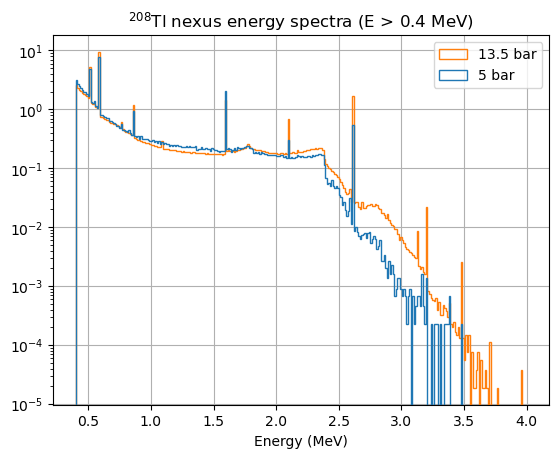

In [15]:
nbins = 300
xrange = (0.4, 4)
b = plt.hist(info_df_208Tl_13bar.tot_ene, nbins, range = xrange, color='tab:orange', density = True,  histtype='step', label = '13.5 bar')
a = plt.hist(info_df_208Tl_5bar.tot_ene, nbins, range = xrange, color='tab:blue', density = True, histtype='step', label = '5 bar')
plt.title(r'$^{208}$Tl nexus energy spectra (E > 0.4 MeV)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.show()

In [16]:
nbins = 300
xrange = (1.5, 2.7)
b = plt.hist(info_df_208Tl_13bar.tot_ene, nbins, range = xrange, color='tab:orange', density = True,  histtype='step', label = '13.5 bar')
a = plt.hist(info_df_208Tl_5bar.tot_ene, nbins, range = xrange, color='tab:blue', density = True, histtype='step', label = '5 bar')

plt.title(r'$^{208}$Tl nexus energy (close up to peaks)')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.show()

In [17]:
nbins = 300
xrange = (0.4, 4)
b = plt.hist(info_df_208Tl_13bar.tot_ene, nbins, range = xrange, weights = list(1 / sim_evs_info_13bar.prod(axis=1).values) * len(info_df_208Tl_13bar), histtype='step', label = 'p = 13.5 bar', cumulative = -1)
a = plt.hist(info_df_208Tl_5bar.tot_ene, nbins, range = xrange, weights = list(1 / sim_evs_info_5bar.prod(axis=1).values) * len(info_df_208Tl_5bar), histtype='step', label = 'p = 5 bar', cumulative=-1)
plt.title(r'Nexus efficiency above certain energy for $^{208}$Tl')
plt.legend()
plt.yscale('log')
plt.grid()
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency')
plt.show()

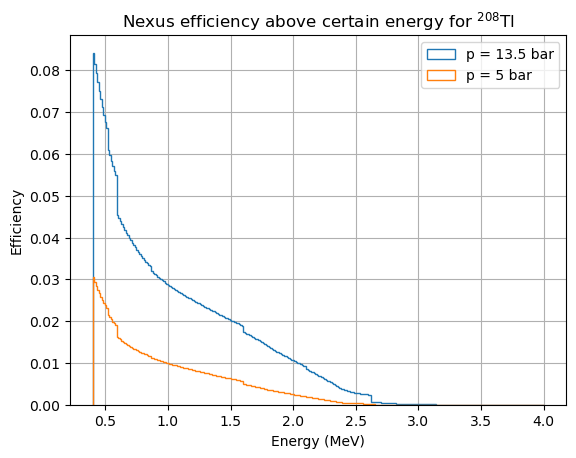

In [18]:
nbins = 300
xrange = (0.4, 4)
b = plt.hist(info_df_208Tl_13bar.tot_ene, nbins, range = xrange, weights = list(1 / sim_evs_info_13bar.prod(axis=1).values) * len(info_df_208Tl_13bar), histtype='step', label = 'p = 13.5 bar', cumulative = -1)
a = plt.hist(info_df_208Tl_5bar.tot_ene, nbins, range = xrange, weights = list(1 / sim_evs_info_5bar.prod(axis=1).values) * len(info_df_208Tl_5bar), histtype='step', label = 'p = 5 bar', cumulative=-1)
plt.title(r'Nexus efficiency above certain energy for $^{208}$Tl')
plt.legend()
#plt.yscale('log')
plt.grid()
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency')
plt.show()

Hacer eficiencia de MC en el double scape y esas cosites

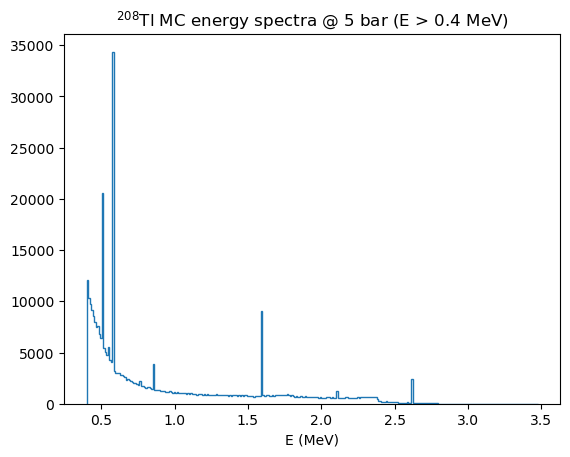

In [19]:
plt.hist(info_df_208Tl_5bar.tot_ene, nbins, histtype='step', label = 'p = 5 bar')
plt.title(r'$^{208}$Tl MC energy spectra @ 5 bar (E > 0.4 MeV)')
plt.xlabel('E (MeV)')
plt.show()

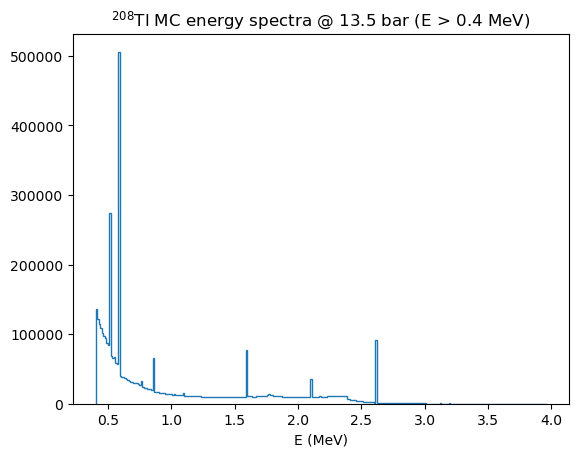

In [20]:
plt.hist(info_df_208Tl_13bar.tot_ene, nbins, histtype='step', label = 'p = 5 bar')
plt.title(r'$^{208}$Tl MC energy spectra @ 13.5 bar (E > 0.4 MeV)')
plt.xlabel('E (MeV)')
plt.show()

## Isaura comparison @13.5 and 5 bar

In [4]:
isa_path_5bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/prod/isaura_summary_208Tl.h4'
isa_path_5bar_10mm = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/prod/isaura_summary_10mm_208Tl.h4'
isa_path_5bar_15mm = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/prod/isaura_summary_15mm_208Tl.h4'
isa_path_13bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/HPR/208Tl/prod/isaura_summary_208Tl.h4'

In [5]:
esm_path_5bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/prod/esmeralda_summary_208Tl.h4'
esm_path_13bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/HPR/208Tl/prod/esmeralda_summary_208Tl.h4'

In [5]:
isa_summary_5bar = pd.read_hdf(isa_path_5bar, 'summary')
isa_tracks_5bar  = pd.read_hdf(isa_path_5bar, 'tracks')

isa_summary_5bar_10mm = pd.read_hdf(isa_path_5bar_10mm, 'summary')
isa_tracks_5bar_10mm  = pd.read_hdf(isa_path_5bar_10mm, 'tracks')

isa_summary_5bar_15mm = pd.read_hdf(isa_path_5bar_15mm, 'summary')
isa_tracks_5bar_15mm  = pd.read_hdf(isa_path_5bar_15mm, 'tracks')

isa_summary_13bar = pd.read_hdf(isa_path_13bar, 'summary')
isa_tracks_13bar  = pd.read_hdf(isa_path_13bar, 'tracks')

In [6]:
esm_summary_5bar = pd.read_hdf(esm_path_5bar, 'summary')
esm_tracks_5bar  = pd.read_hdf(esm_path_5bar, 'tracks')

esm_summary_13bar = pd.read_hdf(esm_path_13bar, 'summary')
esm_tracks_13bar  = pd.read_hdf(esm_path_13bar, 'tracks')

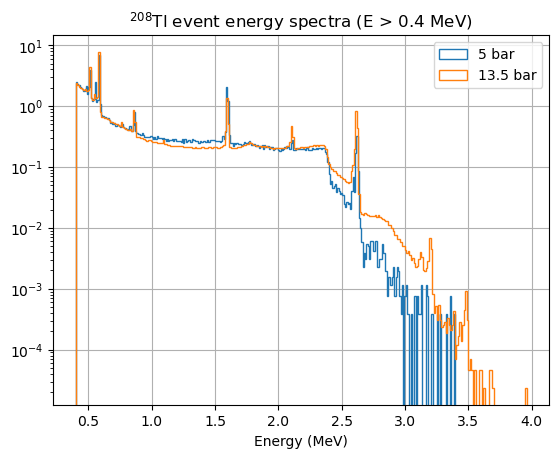

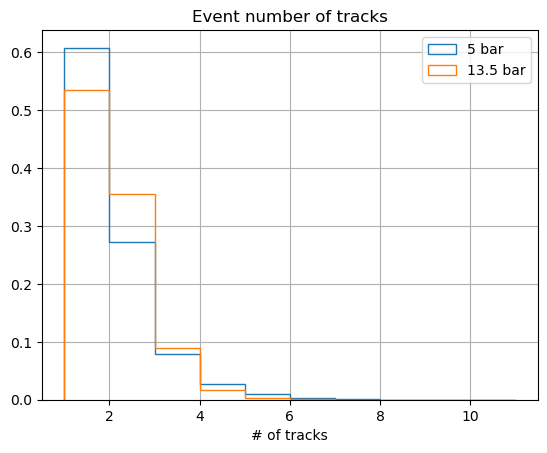

In [7]:
e_th = 0.4

esm_summary_5bar_ = esm_summary_5bar[esm_summary_5bar.evt_energy > e_th]
esm_summary_13bar_ = esm_summary_13bar[esm_summary_13bar.evt_energy > e_th]


plt.hist(esm_summary_5bar_.evt_energy, 300, histtype='step', density = True, label = '5 bar')
plt.hist(esm_summary_13bar_.evt_energy, 300, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.title('Event energy distribution')
plt.grid()
plt.show()

plt.hist(esm_summary_5bar_.evt_energy, 300, histtype='step', density = True, label = '5 bar')
plt.hist(esm_summary_13bar_.evt_energy, 300, histtype='step', density = True, label = '13.5 bar')
plt.yscale('log')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.title(r'$^{208}$Tl event energy spectra (E > 0.4 MeV)')
plt.grid()
plt.show()

plt.hist(esm_summary_5bar_.evt_ntrks, esm_summary_5bar_.evt_ntrks.max(),  histtype='step', range = (esm_summary_5bar_.evt_ntrks.min(), esm_summary_5bar_.evt_ntrks.max() + 1),  density = True, label = '5 bar')
plt.hist(esm_summary_13bar_.evt_ntrks, esm_summary_13bar_.evt_ntrks.max(),  histtype='step', range = (esm_summary_13bar_.evt_ntrks.min(), esm_summary_13bar_.evt_ntrks.max() + 1),  density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of tracks')
plt.title('Event number of tracks')
plt.grid()
plt.show()

plt.hist(esm_summary_5bar_.evt_nhits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(esm_summary_13bar_.evt_nhits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Event number of hits')
plt.grid()
plt.show()

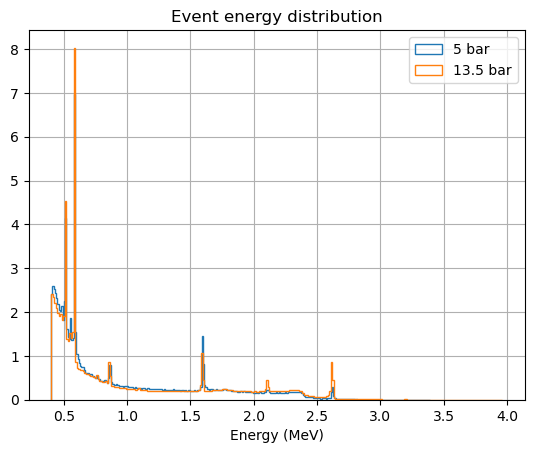

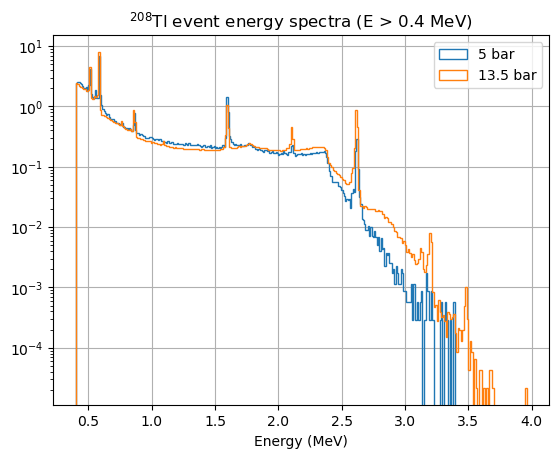

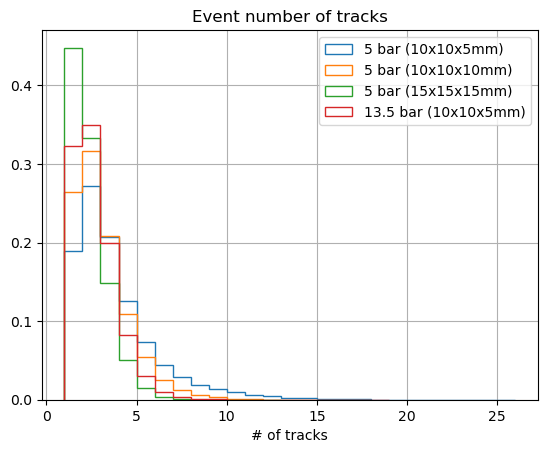

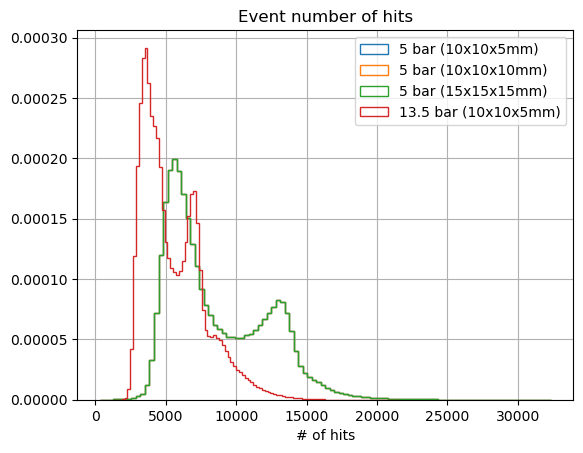

In [6]:
e_th = 0.4

isa_summary_5bar_ = isa_summary_5bar[isa_summary_5bar.evt_energy > e_th]
isa_summary_5bar_10mm_ = isa_summary_5bar_10mm[isa_summary_5bar_10mm.evt_energy > e_th]
isa_summary_5bar_15mm_ = isa_summary_5bar_15mm[isa_summary_5bar_15mm.evt_energy > e_th]
isa_summary_13bar_ = isa_summary_13bar[isa_summary_13bar.evt_energy > e_th]


plt.hist(isa_summary_5bar_.evt_energy, 300, histtype='step', density = True, label = '5 bar')
plt.hist(isa_summary_13bar_.evt_energy, 300, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.title('Event energy distribution')
plt.grid()
plt.show()

plt.hist(isa_summary_5bar_.evt_energy, 300, histtype='step', density = True, label = '5 bar')
plt.hist(isa_summary_13bar_.evt_energy, 300, histtype='step', density = True, label = '13.5 bar')
plt.yscale('log')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.title(r'$^{208}$Tl event energy spectra (E > 0.4 MeV)')
plt.grid()
plt.show()

plt.hist(isa_summary_5bar_.evt_ntrks, isa_summary_5bar_.evt_ntrks.max(),  histtype='step', range = (isa_summary_5bar_.evt_ntrks.min(), isa_summary_5bar_.evt_ntrks.max() + 1),  density = True, label = '5 bar (10x10x5mm)')
plt.hist(isa_summary_5bar_10mm_.evt_ntrks, isa_summary_5bar_10mm_.evt_ntrks.max(),  histtype='step', range = (isa_summary_5bar_10mm_.evt_ntrks.min(), isa_summary_5bar_10mm_.evt_ntrks.max() + 1),  density = True, label = '5 bar (10x10x10mm)')
plt.hist(isa_summary_5bar_15mm_.evt_ntrks, isa_summary_5bar_15mm_.evt_ntrks.max(),  histtype='step', range = (isa_summary_5bar_15mm_.evt_ntrks.min(), isa_summary_5bar_15mm_.evt_ntrks.max() + 1),  density = True, label = '5 bar (15x15x15mm)')
plt.hist(isa_summary_13bar_.evt_ntrks, isa_summary_13bar_.evt_ntrks.max(),  histtype='step', range = (isa_summary_13bar_.evt_ntrks.min(), isa_summary_13bar_.evt_ntrks.max() + 1),  density = True, label = '13.5 bar (10x10x5mm)')
plt.legend()
plt.xlabel('# of tracks')
plt.title('Event number of tracks')
plt.grid()
plt.show()

plt.hist(isa_summary_5bar_.evt_nhits, 100, histtype='step', density = True, label = '5 bar (10x10x5mm)')
plt.hist(isa_summary_5bar_10mm_.evt_nhits, 100, histtype='step', density = True, label = '5 bar (10x10x10mm)')
plt.hist(isa_summary_5bar_15mm_.evt_nhits, 100, histtype='step', density = True, label = '5 bar (15x15x15mm)')
plt.hist(isa_summary_13bar_.evt_nhits, 100, histtype='step', density = True, label = '13.5 bar (10x10x5mm)')
plt.legend()
plt.xlabel('# of hits')
plt.title('Event number of hits')
plt.grid()
plt.show()

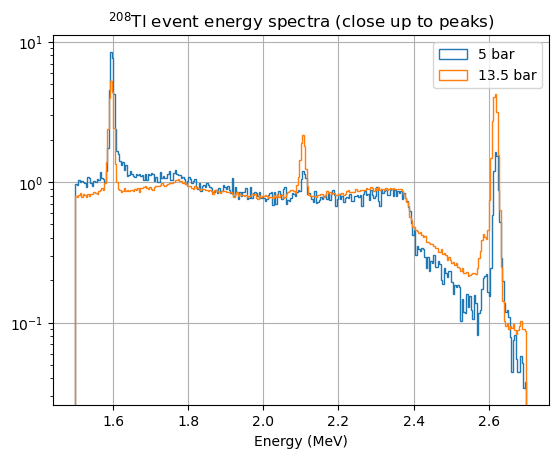

In [13]:
plt.hist(isa_summary_5bar_.evt_energy, 300, range = (1.5, 2.7), histtype='step', density = True, label = '5 bar')
plt.hist(isa_summary_13bar_.evt_energy, 300, range = (1.5, 2.7), histtype='step', density = True, label = '13.5 bar')
plt.yscale('log')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.title(r'$^{208}$Tl event energy spectra (close up to peaks)')
plt.grid()
plt.show()

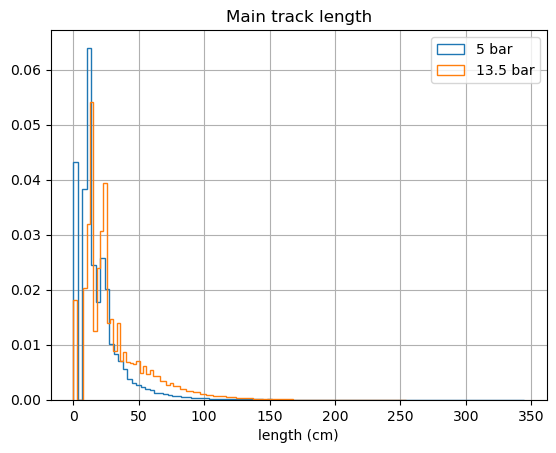

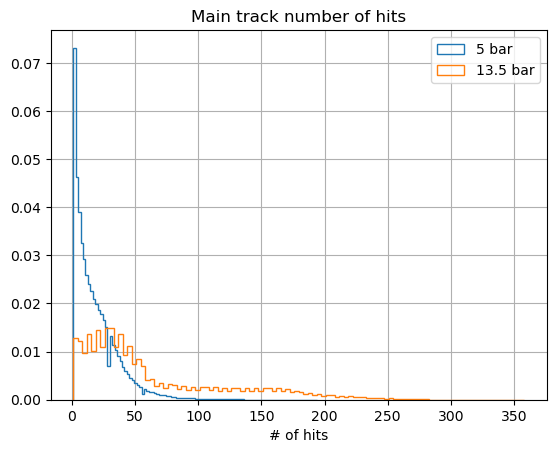

In [14]:
esm_tracks_5bar_ = esm_tracks_5bar[(esm_tracks_5bar.trackID == 0)] #(isa_tracks_5bar.numb_of_tracks == 1) &
esm_tracks_13bar_ = esm_tracks_13bar[(esm_tracks_13bar.trackID == 0)] #(isa_tracks_13bar.numb_of_tracks == 1) & 

plt.hist(esm_tracks_5bar_.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(esm_tracks_13bar_.length, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length')
plt.grid()
plt.show()

plt.hist(esm_tracks_5bar_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(esm_tracks_13bar_.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits')
plt.grid()
plt.show()

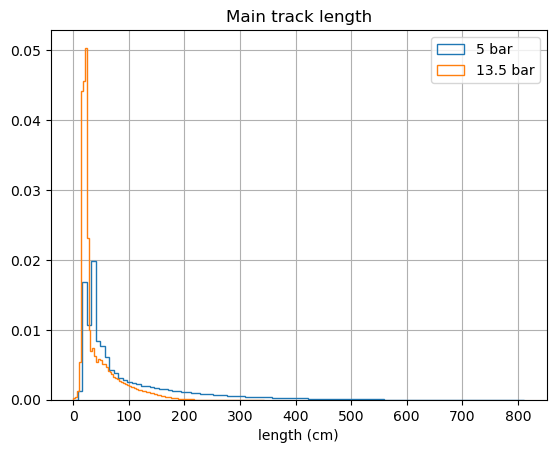

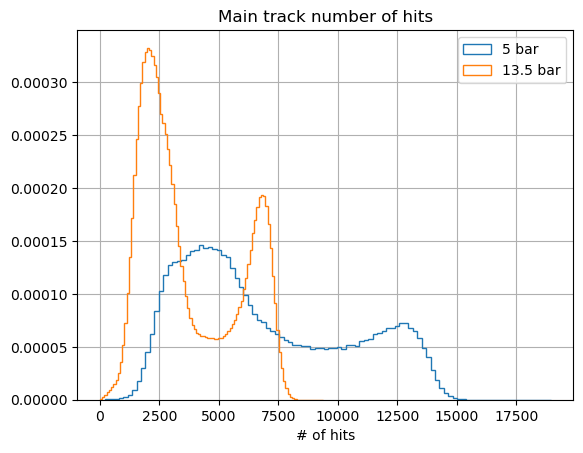

In [7]:
isa_tracks_5bar_ = isa_tracks_5bar[(isa_tracks_5bar.trackID == 0)] #(isa_tracks_5bar.numb_of_tracks == 1) &
isa_tracks_5bar_10mm_ = isa_tracks_5bar_10mm[(isa_tracks_5bar_10mm.trackID == 0)] #(isa_tracks_5bar_15mm.numb_of_tracks == 1) &
isa_tracks_5bar_15mm_ = isa_tracks_5bar_15mm[(isa_tracks_5bar_15mm.trackID == 0)] #(isa_tracks_5bar_15mm.numb_of_tracks == 1) &
isa_tracks_13bar_ = isa_tracks_13bar[(isa_tracks_13bar.trackID == 0)] #(isa_tracks_13bar.numb_of_tracks == 1) & 

#plt.hist(isa_tracks_5bar_.length, 100, histtype='step', density = True, label = '5 bar')
#plt.hist(isa_tracks_5bar_10mm_.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(isa_tracks_5bar_15mm_.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(isa_tracks_13bar_.length, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length')
plt.grid()
plt.show()

#plt.hist(isa_tracks_5bar_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
#plt.hist(isa_tracks_5bar_10mm_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(isa_tracks_5bar_15mm_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(isa_tracks_13bar_.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits')
plt.grid()
plt.show()

### For 5 bar we have ~300k events that passed all the processing and have E>0.4MeV (we simulated 12M, that is around 2.5% of eff)
### For 13.5 bar we have ~4M events that passed all the processing and have E>0.4MeV (we simulated 52.8M, that is around 7.5% of eff)

In [16]:
from scipy.optimize import curve_fit

def gauss(x, a, mu, sigma, m, c):
    return a * np.exp(-((x - mu) / sigma) ** 2 / 2) + m * x + c 

In [17]:
#trashy function, very hard coded
def fit_and_plot_peaks(data, fun, nbins, fitrange, plotrange, initial_params, bounds, title):
    y, x = np.histogram(data, nbins, range = fitrange, density = True)
    params, cov = curve_fit(fun, x[:-1], y, p0=initial_params, bounds = bounds, maxfev = 2000)
    yfit = fun(x, params[0], params[1], params[2], params[3], params[4])

    R = 2 * np.sqrt(2 * np.log(2)) * params[2] * 100 / params[1]
    sR = R * np.sqrt((cov[2, 2] / params[2]) **2 + (cov[1, 1]/params[1])**2)

    legend_string = r'$\mu={:.3f} \pm {:.3e}$'.format(params[1], cov[1,1]) + '\n' + \
                    r'$\sigma={:.3f} \pm {:.3e}$'.format(params[2], cov[2,2]) + '\n' + \
                    r'R(%) = ${:.3f} \pm {:.3e}$'.format(R, sR)
    
    plt.hist(data, nbins, range = plotrange, histtype='step', density = True)
    plt.plot(x, yfit, 'r-', label = legend_string)
    plt.legend()
    plt.xlabel('E (MeV)')
    plt.title(title)
    plt.grid()
    plt.show()
    return params[1], params[2], R

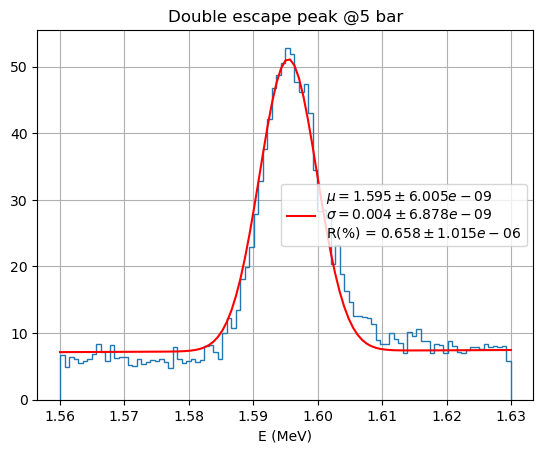

In [18]:
nbins = 100
fitrange = (1.56, 1.63)
plotrange = (1.56, 1.63)
initial_params = [50, 1.6, 0.02, 0, 7]
bounds = ([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])
title = 'Double escape peak @5 bar'

ds_5bar = fit_and_plot_peaks(isa_summary_5bar_.evt_energy, gauss, nbins, fitrange, plotrange, initial_params, bounds, title)

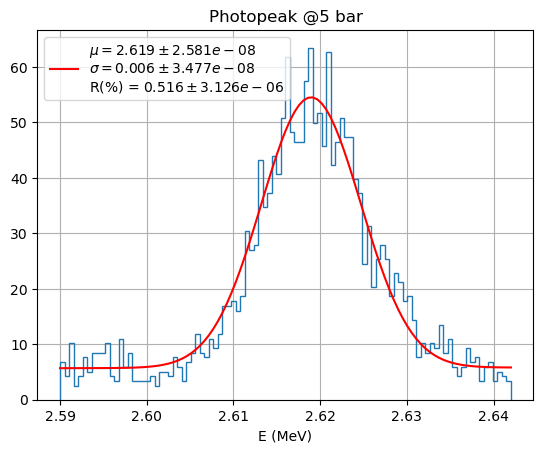

In [33]:
nbins = 100
fitrange = (2.59, 2.642)
plotrange = (2.59, 2.642)
initial_params = [70, 2.6, 0.2, 0, 5]
bounds = ([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])
title = 'Photopeak @5 bar'

pp_5bar = fit_and_plot_peaks(isa_summary_5bar_.evt_energy, gauss, nbins, fitrange, plotrange, initial_params, bounds, title)

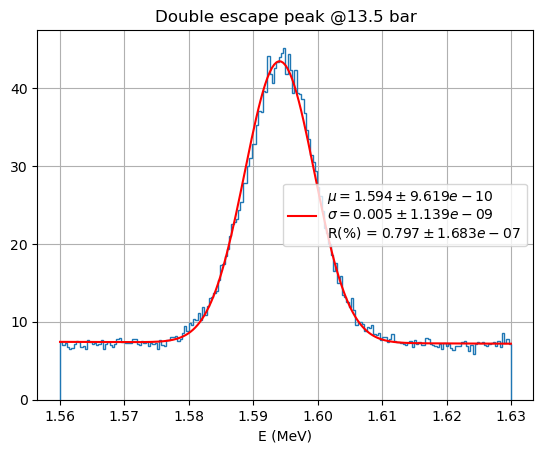

In [34]:
nbins = 200
fitrange = (1.56, 1.63) #(1.58, 1.61)
plotrange = (1.56, 1.63)
initial_params = [40, 1.6, 0.04, 0, 5]
bounds = ([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])
title = 'Double escape peak @13.5 bar'

ds_13bar = fit_and_plot_peaks(isa_summary_13bar_.evt_energy, gauss, nbins, fitrange, plotrange, initial_params, bounds, title)


In [35]:
nbins = 200
fitrange = (2.59, 2.642)
plotrange = (2.59, 2.642)
initial_params = [60, 2.6, 0.04, 0, 5]
bounds = ([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])
title = 'Photopeak @13.5 bar'

pp_13bar = fit_and_plot_peaks(isa_summary_13bar_.evt_energy, gauss, nbins, fitrange, plotrange, initial_params, bounds, title)

## DS track info

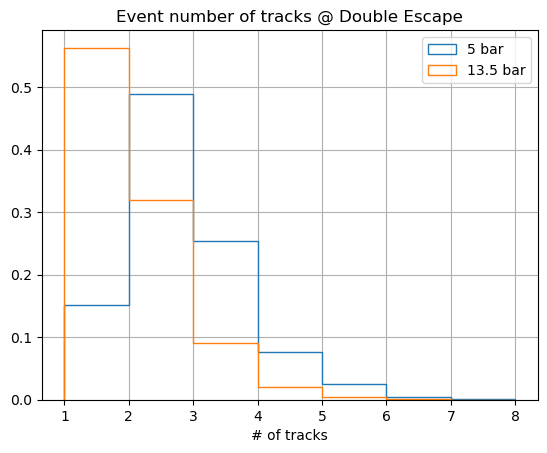

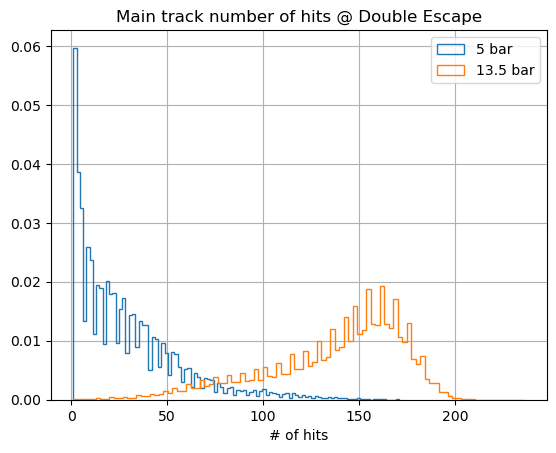

In [36]:
ds_peak_5bar  = (1.56, 1.63)
ds_peak_13bar = (1.56, 1.63)

ds_tracks_5bar  = esm_tracks_5bar.merge(esm_summary_5bar[(esm_summary_5bar.evt_energy > ds_peak_5bar[0]) & (esm_summary_5bar.evt_energy < ds_peak_5bar[1])], on = ['event', 'port'])
ds_tracks_13bar = esm_tracks_13bar.merge(esm_summary_13bar[(esm_summary_13bar.evt_energy > ds_peak_13bar[0]) & (esm_summary_13bar.evt_energy < ds_peak_13bar[1])], on = ['event', 'port'])

plt.hist(ds_tracks_5bar.evt_ntrks, ds_tracks_5bar.evt_ntrks.max(),  histtype='step', range = (ds_tracks_5bar.evt_ntrks.min(), ds_tracks_5bar.evt_ntrks.max() + 1),  density = True, label = '5 bar')
plt.hist(ds_tracks_13bar.evt_ntrks, ds_tracks_13bar.evt_ntrks.max(),  histtype='step', range = (ds_tracks_13bar.evt_ntrks.min(), ds_tracks_13bar.evt_ntrks.max() + 1),  density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of tracks')
plt.title('Event number of tracks @ Double Escape')
plt.grid()
plt.show()

plt.hist(ds_tracks_5bar.evt_nhits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(ds_tracks_13bar.evt_nhits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Event number of hits @ Double Escape')
plt.grid()
plt.show()

ds_tracks_5bar_ = ds_tracks_5bar[(ds_tracks_5bar.trackID == 0)]
ds_tracks_13bar_ = ds_tracks_13bar[(ds_tracks_13bar.trackID == 0)]

plt.hist(ds_tracks_5bar_.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(ds_tracks_13bar_.length, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length @ Double Escape')
plt.grid()
plt.show()

plt.hist(ds_tracks_5bar_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(ds_tracks_13bar_.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits @ Double Escape')
plt.grid()
plt.show()

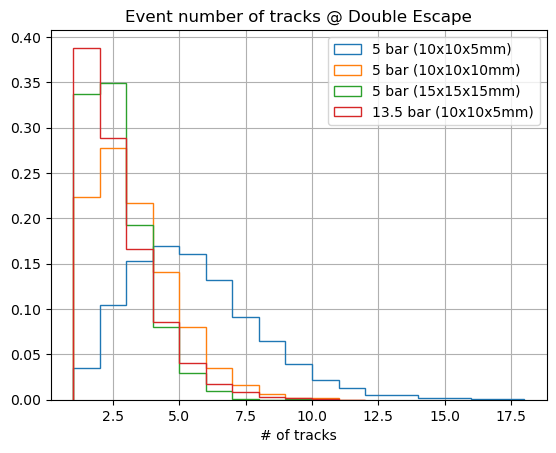

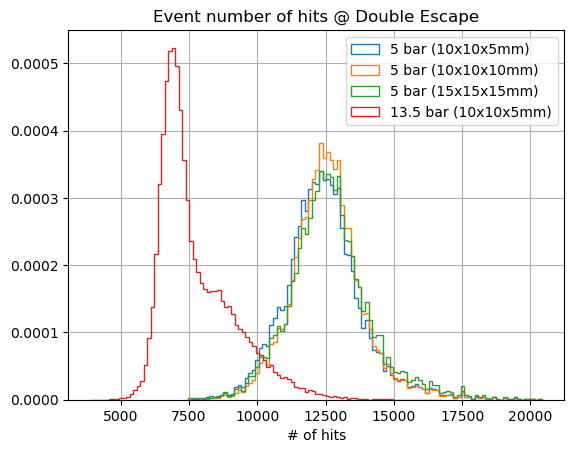

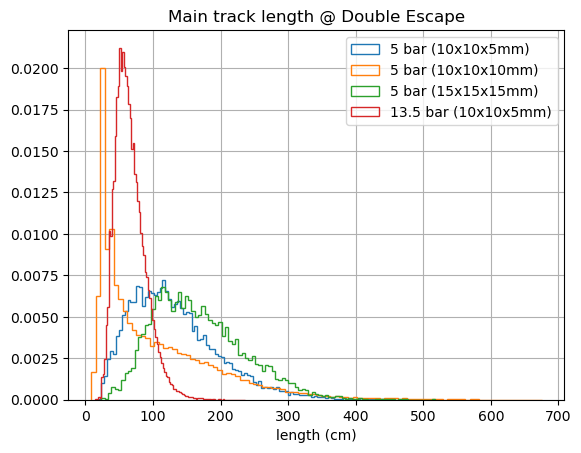

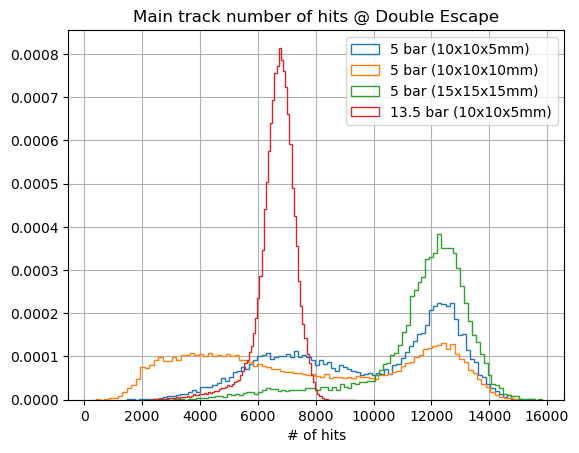

In [8]:
ds_peak_5bar  = (1.56, 1.63)
ds_peak_13bar = (1.56, 1.63)

ds_tracks_5bar  = isa_tracks_5bar.merge(isa_summary_5bar[(isa_summary_5bar.evt_energy > ds_peak_5bar[0]) & (isa_summary_5bar.evt_energy < ds_peak_5bar[1])], on = ['event', 'port'])
ds_tracks_5bar_10mm  = isa_tracks_5bar_10mm.merge(isa_summary_5bar_10mm[(isa_summary_5bar_10mm.evt_energy > ds_peak_5bar[0]) & (isa_summary_5bar_10mm.evt_energy < ds_peak_5bar[1])], on = ['event', 'port'])
ds_tracks_5bar_15mm  = isa_tracks_5bar_15mm.merge(isa_summary_5bar_15mm[(isa_summary_5bar_15mm.evt_energy > ds_peak_5bar[0]) & (isa_summary_5bar_15mm.evt_energy < ds_peak_5bar[1])], on = ['event', 'port'])
ds_tracks_13bar = isa_tracks_13bar.merge(isa_summary_13bar[(isa_summary_13bar.evt_energy > ds_peak_13bar[0]) & (isa_summary_13bar.evt_energy < ds_peak_13bar[1])], on = ['event', 'port'])

plt.hist(ds_tracks_5bar.evt_ntrks, ds_tracks_5bar.evt_ntrks.max(),  histtype='step', range = (ds_tracks_5bar.evt_ntrks.min(), ds_tracks_5bar.evt_ntrks.max() + 1),  density = True, label = '5 bar (10x10x5mm)')
plt.hist(ds_tracks_5bar_10mm.evt_ntrks, ds_tracks_5bar_10mm.evt_ntrks.max(),  histtype='step', range = (ds_tracks_5bar_10mm.evt_ntrks.min(), ds_tracks_5bar_10mm.evt_ntrks.max() + 1),  density = True, label = '5 bar (10x10x10mm)')
plt.hist(ds_tracks_5bar_15mm.evt_ntrks, ds_tracks_5bar_15mm.evt_ntrks.max(),  histtype='step', range = (ds_tracks_5bar_15mm.evt_ntrks.min(), ds_tracks_5bar_15mm.evt_ntrks.max() + 1),  density = True, label = '5 bar (15x15x15mm)')
plt.hist(ds_tracks_13bar.evt_ntrks, ds_tracks_13bar.evt_ntrks.max(),  histtype='step', range = (ds_tracks_13bar.evt_ntrks.min(), ds_tracks_13bar.evt_ntrks.max() + 1),  density = True, label = '13.5 bar (10x10x5mm)')
plt.legend()
plt.xlabel('# of tracks')
plt.title('Event number of tracks @ Double Escape')
plt.grid()
plt.show()

plt.hist(ds_tracks_5bar.evt_nhits, 100, histtype='step', density = True, label = '5 bar (10x10x5mm)')
plt.hist(ds_tracks_5bar_10mm.evt_nhits, 100, histtype='step', density = True, label = '5 bar (10x10x10mm)')
plt.hist(ds_tracks_5bar_15mm.evt_nhits, 100, histtype='step', density = True, label = '5 bar (15x15x15mm)')
plt.hist(ds_tracks_13bar.evt_nhits, 100, histtype='step', density = True, label = '13.5 bar (10x10x5mm)')
plt.legend()
plt.xlabel('# of hits')
plt.title('Event number of hits @ Double Escape')
plt.grid()
plt.show()

ds_tracks_5bar_ = ds_tracks_5bar[(ds_tracks_5bar.trackID == 0)]
ds_tracks_5bar_10mm_ = ds_tracks_5bar_10mm[(ds_tracks_5bar_10mm.trackID == 0)]
ds_tracks_5bar_15mm_ = ds_tracks_5bar_15mm[(ds_tracks_5bar_15mm.trackID == 0)]
ds_tracks_13bar_ = ds_tracks_13bar[(ds_tracks_13bar.trackID == 0)]

plt.hist(ds_tracks_5bar_.length, 100, histtype='step', density = True, label = '5 bar (10x10x5mm)')
plt.hist(ds_tracks_5bar_10mm_.length, 100, histtype='step', density = True, label = '5 bar (10x10x10mm)')
plt.hist(ds_tracks_5bar_15mm_.length, 100, histtype='step', density = True, label = '5 bar (15x15x15mm)')
plt.hist(ds_tracks_13bar_.length, 100, histtype='step', density = True, label = '13.5 bar (10x10x5mm)')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length @ Double Escape')
plt.grid()
plt.show()

plt.hist(ds_tracks_5bar_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar (10x10x5mm)')
plt.hist(ds_tracks_5bar_10mm_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar (10x10x10mm)')
plt.hist(ds_tracks_5bar_15mm_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar (15x15x15mm)')
plt.hist(ds_tracks_13bar_.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar (10x10x5mm)')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits @ Double Escape')
plt.grid()
plt.show()

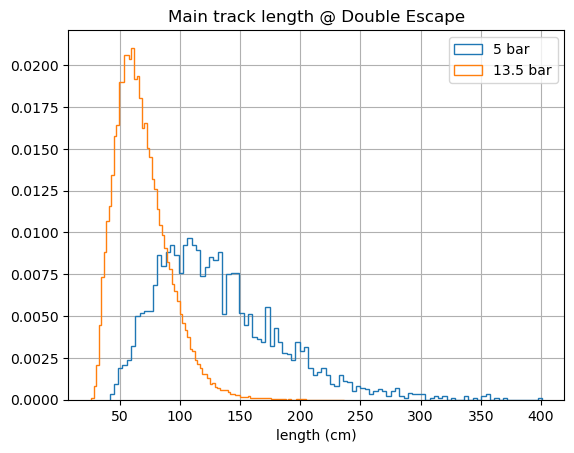

In [84]:
nhits_high = (6000, 7500)

ds_tracks_5bar_highhits = ds_tracks_5bar_[(ds_tracks_5bar_.numb_of_hits > nhits_high[0]) & (ds_tracks_5bar_.numb_of_hits < nhits_high[1])]
ds_tracks_13bar_highhits = ds_tracks_13bar_[(ds_tracks_13bar_.numb_of_hits > nhits_high[0]) & (ds_tracks_13bar_.numb_of_hits < nhits_high[1])]


plt.hist(ds_tracks_5bar_highhits.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(ds_tracks_13bar_highhits.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits @ Double Escape') # & with high # of hits')
plt.grid()
plt.show()


plt.hist(ds_tracks_5bar_highhits.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(ds_tracks_13bar_highhits.length, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length @ Double Escape') #& with high # of hits')
plt.grid()
plt.show()

## PhotoPeak tracks info

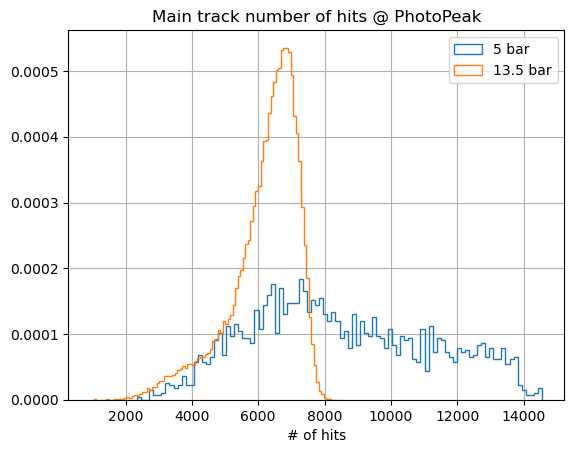

In [12]:
pp_peak_5bar  = (2.59, 2.642)
pp_peak_13bar = (2.59, 2.642)

pp_tracks_5bar  = isa_tracks_5bar.merge(isa_summary_5bar[(isa_summary_5bar.evt_energy > pp_peak_5bar[0]) & (isa_summary_5bar.evt_energy < pp_peak_5bar[1])], on = ['event', 'port'])
pp_tracks_13bar = isa_tracks_13bar.merge(isa_summary_13bar[(isa_summary_13bar.evt_energy > pp_peak_13bar[0]) & (isa_summary_13bar.evt_energy < pp_peak_13bar[1])], on = ['event', 'port'])

plt.hist(pp_tracks_5bar.evt_ntrks, pp_tracks_5bar.evt_ntrks.max(),  histtype='step', range = (pp_tracks_5bar.evt_ntrks.min(), pp_tracks_5bar.evt_ntrks.max() + 1),  density = True, label = '5 bar')
plt.hist(pp_tracks_13bar.evt_ntrks, pp_tracks_13bar.evt_ntrks.max(),  histtype='step', range = (pp_tracks_13bar.evt_ntrks.min(), pp_tracks_13bar.evt_ntrks.max() + 1),  density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of tracks')
plt.title('Event number of tracks @ PhotoPeak')
plt.grid()
plt.show()

plt.hist(pp_tracks_5bar.evt_nhits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(pp_tracks_13bar.evt_nhits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Event number of hits @ PhotoPeak')
plt.grid()
plt.show()

pp_tracks_5bar_ = pp_tracks_5bar[(pp_tracks_5bar.trackID == 0)]
pp_tracks_13bar_ = pp_tracks_13bar[(pp_tracks_13bar.trackID == 0)]

plt.hist(pp_tracks_5bar_.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(pp_tracks_13bar_.length, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length @ PhotoPeak')
plt.grid()
plt.show()

plt.hist(pp_tracks_5bar_.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(pp_tracks_13bar_.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits @ PhotoPeak')
plt.grid()

plt.show()

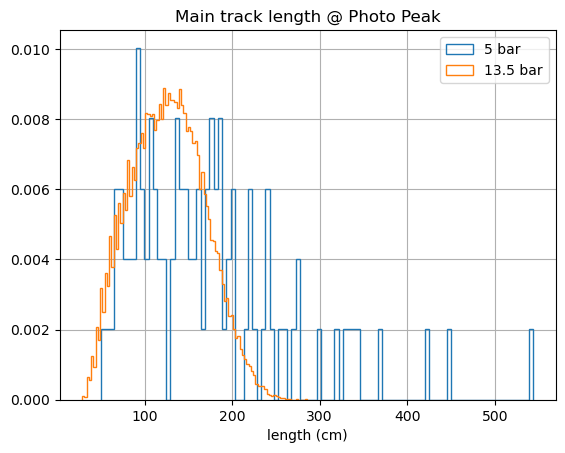

In [ ]:
nhits_high = (6000, 7500)

pp_tracks_5bar_highhits = pp_tracks_5bar_[(pp_tracks_5bar_.numb_of_hits > nhits_high[0]) & (pp_tracks_5bar_.numb_of_hits < nhits_high[1])]
pp_tracks_13bar_highhits = pp_tracks_13bar_[(pp_tracks_13bar_.numb_of_hits > nhits_high[0]) & (pp_tracks_13bar_.numb_of_hits < nhits_high[1])]


plt.hist(pp_tracks_5bar_highhits.numb_of_hits, 100, histtype='step', density = True, label = '5 bar')
plt.hist(pp_tracks_13bar_highhits.numb_of_hits, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('# of hits')
plt.title('Main track number of hits @ Photo Peak') # & with high # of hits')
plt.grid()
plt.show()


plt.hist(pp_tracks_5bar_highhits.length, 100, histtype='step', density = True, label = '5 bar')
plt.hist(pp_tracks_13bar_highhits.length, 100, histtype='step', density = True, label = '13.5 bar')
plt.legend()
plt.xlabel('length (cm)')
plt.title('Main track length @ Photo Peak') #& with high # of hits')
plt.grid()
plt.show()

## MC isaura analysis

In [13]:
save_path_fom_HPR = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/HPR/208Tl/fom_208Tl.h5'
save_path_fom_LPR = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/fom_208Tl.h5'

In [14]:
fom_HPR = pd.read_hdf(save_path_fom_HPR, 'fom')
fom_LPR = pd.read_hdf(save_path_fom_LPR, 'fom')

In [15]:
def get_fom_vals(fom):
    sig = fom.label.sum()
    bkg = len(fom) - sig

    sig_eff = fom[fom.label == 1].sum().iloc[37:] / sig
    bkg_eff = fom[fom.label == 0].sum().iloc[37:] / bkg
    fom_values = sig_eff / bkg_eff.apply(lambda x: np.sqrt(x))
    return sig_eff, bkg_eff, fom_values

In [5]:
sig_eff_HPR, bkg_eff_HPR, fom_values_HPR = get_fom_vals(fom_HPR)
sig_eff_LPR, bkg_eff_LPR, fom_values_LPR = get_fom_vals(fom_LPR)

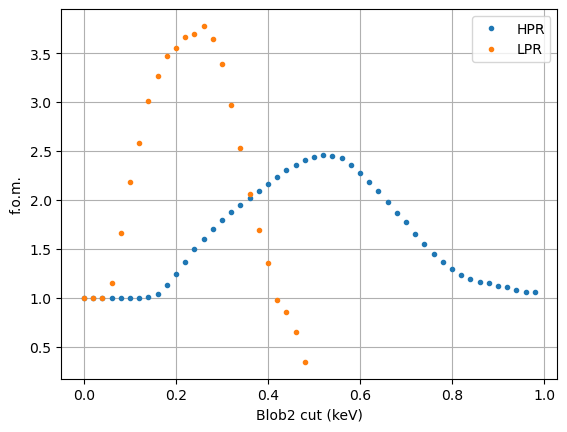

In [6]:
plt.plot(1 - bkg_eff_HPR, sig_eff_HPR, '.', label = 'HPR')
plt.plot(1 - bkg_eff_LPR, sig_eff_LPR, '.', label = 'LPR')
plt.xlabel('Background rejection')
plt.ylabel('Signal efficiency')
plt.xticks(np.arange(0, 1.2, 0.2))
plt.grid()
plt.legend()
plt.show()

plt.plot(np.arange(0, 1, 0.02), fom_values_HPR, '.', label = 'HPR')
plt.plot(np.arange(0, 1, 0.02), fom_values_LPR, '.', label = 'LPR')
plt.xlabel('Blob2 cut (keV)')
plt.ylabel('f.o.m.')
plt.legend()
plt.grid()

### Plot tracks

In [16]:
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot  as plt
import matplotlib         as mpl
from   mpl_toolkits.mplot3d import Axes3D
from   matplotlib.patches   import Patch
from invisible_cities.io.dst_io import load_dst
import itertools

In [17]:
def plot_3d_hits(hits, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet, opacity = 1, title = ''):
    '''
    Function to plot hits
    Args:
        hits: DataFrame or list/tuple/array of lists/tuples/arrays
    Contains the spatial information of the hits and their content. If we don't use a DataFrame, the input
    must have the structure (x, y, z, content), where content is usually the energy or the segclass. Its shape
    will be (4, N).
        value: STR
    Name of the content column in the DataFrame. Will be also the label of the colorbar.
        coords: LIST
    Name of the coords column in the DataFrame.
        cmap: matplotlib.cm
    Used colormap.
        opacity = FLOAT
    Value from 0 to 1 that indicates the opacity of the hits.
    '''

    if type(hits) == type(pd.DataFrame()):
        pass
    else:
        coor = np.array(hits).T
        hits = pd.DataFrame(coor, columns = coords + [value])

    xcoord  = hits[coords[0]].values
    ycoord  = hits[coords[1]].values
    zcoord  = hits[coords[2]].values
    content = hits[value].values

    fig  = plt.figure(figsize=(8, 8), frameon=False)
    gs   = fig.add_gridspec(12, 12)
    ax   = fig.add_subplot(gs[0:12, 0:10], projection = '3d')
    axcb = fig.add_subplot(gs[1:11, 11])
    norm = mpl.colors.Normalize(vmin=min(content), vmax=max(content))

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(content))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(xcoord, ycoord, zcoord, c=colors * opacity, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')


    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    ax.set_title(title)
    cb.set_label (value, size = 15)
    cb.ax.tick_params(labelsize=13)
    cb.formatter.set_powerlimits((0, 0))
    plt.show()



def plot_label_creator(min_vals, max_vals, voxel_size, affluence):
    '''
    Function to create ticks and its labels to plot an event.

    Args:
        min_vals: TUPLE
    Contains the minimum values for each coordinate of the position of all the voxels in an event.

        max_vals: TUPLE
    Contains the maximum values for each coordinate of the position of all the voxels in an event.

        voxel_size: TUPLE
    Contains the voxel size of the detector for each coordinate. Used to create the labels.

        affluence: TUPLE
    Separation parameter for the labels in each coordinate. If 1, labels will be plotted for each voxel step,
    if 2, they will be plotted each 2 voxel steps, etc.

    RETURNS:
        labels: LIST
    List of arrays (one per coord.) with the labels we want to use (those consistent with the voxel size in
    each coordinate).

        ticks: LIST
    List of arrays (one per coord.) with the ticks that we want to label.
    '''
    labels = []
    ticks  = []
    for mini, maxi, size, aff in zip(min_vals, max_vals, voxel_size, affluence):
        labels.append(np.arange((mini - mini) * size, (maxi - mini + 2) * size, size * aff))
        ticks.append(np.arange(0, maxi - mini + 2, aff))
    return labels, ticks


def plot_3d_vox(hits_digitized, voxel_size, value='energy', coords = ['x', 'y', 'z'], affluence = (5, 5, 5), th=0, edgecolor='k', linewidth = .3, cmap=mpl.cm.jet, opacity = 1):
    '''
    Function to plot voxels (they have to be normalized)
    Args:
        hits_digitized: DataFrame or list/tuple/array of lists/tuples/arrays in any combination
    Contains the spatial information of the voxels and their content. If we don't use a DataFrame, the input
    must have the structure (x, y, z, content), where content is usually the energy or the segclass. Its shape
    will be (4, N).
        value: STR
    Name of the content column in the DataFrame. Will be also the label of the colorbar.
        coords: LIST
    Name of the coords column in the DataFrame.
        th: FLOAT
    Low threshold of the content of the voxels to plot.
        edgecolor: STR
    Color of the edges of the voxels.
        linewidth: FLOAT
    Width of the edges of the voxels.
        cmap: matplotlib.cm
    Used colormap.
        opacity = FLOAT
    Value from 0 to 1 that indicates the opacity of the voxels.
    '''

    if type(hits_digitized) == type(pd.DataFrame()):
        pass
    else:
        coor = np.array(hits_digitized).T
        hits_digitized = pd.DataFrame(coor, columns = coords + [value])

    xcoord  = hits_digitized[coords[0]].values
    ycoord  = hits_digitized[coords[1]].values
    zcoord  = hits_digitized[coords[2]].values
    content = hits_digitized[value].values

    xmin, xmax = min(xcoord), max(xcoord)
    ymin, ymax = min(ycoord), max(ycoord)
    zmin, zmax = min(zcoord), max(zcoord)

    labels, ticks = plot_label_creator((xmin, ymin, zmin), (xmax, ymax, zmax), voxel_size, affluence)

    nbinsX = int(np.ceil((xmax-xmin))) + 2
    nbinsY = int(np.ceil((ymax-ymin))) + 2
    nbinsZ = int(np.ceil((zmax-zmin))) + 2
    xarr = np.ones(shape=(nbinsX, nbinsY, nbinsZ))*th

    nonzeros = np.vstack([xcoord-xmin+1,
                          ycoord-ymin+1,
                          zcoord-zmin+1])

    nonzeros = nonzeros.astype(int)
    xarr[tuple(nonzeros)] = content
    dim     = xarr.shape
    voxels  = xarr > th

    fig  = plt.figure(figsize=(8, 8), frameon=False)
    gs   = fig.add_gridspec(12, 12)
    ax   = fig.add_subplot(gs[0:12, 0:10], projection = '3d')
    axcb = fig.add_subplot(gs[1:11, 11])
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(xarr))
    colors = np.rollaxis(colors, 0, 4)

    ax.voxels(voxels, facecolors=colors * opacity, edgecolor=edgecolor, linewidth = linewidth)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    
    if value == 'energy':
        cb_label = 'Energy (MeV)'    
    else:
        cb_label = value
        
    cb.set_label (cb_label)
    #cb.ax.tick_params(labelsize=13)
    cb.formatter.set_powerlimits((0, 0))

    ax.set_xticklabels(labels[0])
    ax.set_xticks(ticks[0])
    ax.set_yticklabels(labels[1])
    ax.set_yticks(ticks[1])
    ax.set_zticklabels(labels[2])
    ax.set_zticks(ticks[2])


In [29]:
def get_bin_indices(hits, bins_info, Rmax=500):
    min_x, max_x, nbins_x = bins_info[0]
    min_y, max_y, nbins_y = bins_info[1]
    min_z, max_z, nbins_z = bins_info[2]
    binsX = np.arange(min_x, max_x, nbins_x) #np.linspace(min_x, max_x, nbins_x)
    binsY = np.arange(min_y, max_y, nbins_y) #np.linspace(min_y, max_y, nbins_y)
    binsZ = np.arange(min_z, max_z, nbins_z) #np.linspace(min_z, max_z, nbins_z)
    
    fiducial_cut = (hits.X**2+hits.Y**2)<Rmax**2
    
    boundary_cut = (hits.X>=binsX.min()) & (hits.X<=binsX.max())\
                 & (hits.Y>=binsY.min()) & (hits.Y<=binsY.max())\
                 & (hits.Z>=binsZ.min()) & (hits.Z<=binsZ.max())

    hits_act = hits[fiducial_cut & boundary_cut].reset_index(drop = True)
    xbin = pd.cut(hits_act.X, binsX, labels = np.arange(0, len(binsX)-1)).astype(int)
    ybin = pd.cut(hits_act.Y, binsY, labels = np.arange(0, len(binsY)-1)).astype(int)
    zbin = pd.cut(hits_act.Z, binsZ, labels = np.arange(0, len(binsZ)-1)).astype(int)

    hits_act = hits_act.assign(xbin=xbin, ybin=ybin, zbin=zbin)
    hits_act.event = hits_act.event.astype(np.int64)

    #outputs df with bins index and energy, and optional label
    out = hits_act.groupby(['xbin', 'ybin', 'zbin', 'event']).apply(
        lambda df:pd.Series({'energy':df['E'].sum()})).reset_index()
    return out

In [30]:
def get_MCtables(filename, config, start_id=0):
    
    hits = get_bin_indices(hits, bins, Rmax=config.Rmax)
    hits = hits.sort_values('event_id')
    eventInfo = hits[['event_id', 'binclass']].drop_duplicates().reset_index(drop=True)
    #create new unique identifier
    dct_map = {eventInfo.iloc[i].event_id : i+start_id for i in range(len(eventInfo))}
    #add dataset_id, pathname and basename to eventInfo
    eventInfo = eventInfo.assign(pathname = pathname, basename = basename, dataset_id = eventInfo.event_id.map(dct_map))
    #add dataset_id to hits and drop event_id
    hits = hits.assign(dataset_id = hits.event_id.map(dct_map))
    hits = hits.drop('event_id', axis=1)

    binsInfo = pd.Series({'min_x'   : min_x ,
                          'max_x'   : max_x ,
                          'nbins_x' : config.nbins_x,
                          'min_y'   : min_y ,
                          'max_y'   : max_y ,
                          'nbins_y' : config.nbins_y,
                          'min_z'   : min_z ,
                          'max_z'   : max_z ,
                          'nbins_z' : config.nbins_z,
                          'Rmax'    : config.Rmax
                          }).to_frame().T

    return eventInfo, binsInfo, hits

/scratch/5518272/ipykernel_2968734/615257898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_selected_tracks['nfile'] = np.ceil(ds_selected_tracks.event / 20000).astype(int)


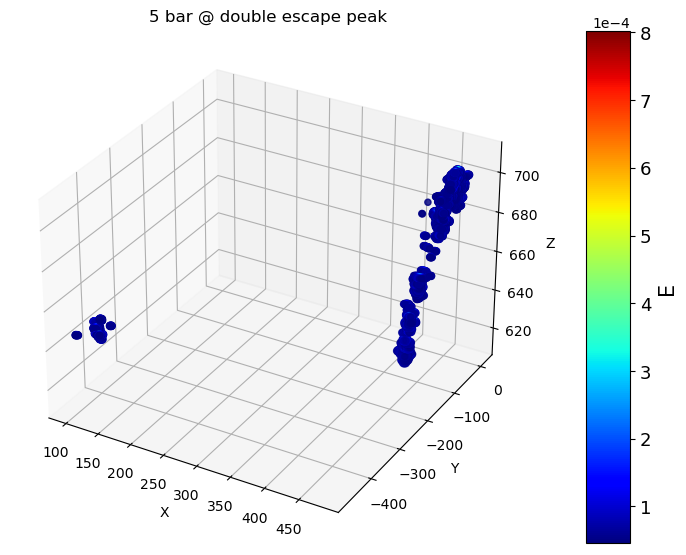

/scratch/5518272/ipykernel_2968734/57226280.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels[0])
/scratch/5518272/ipykernel_2968734/57226280.py:173: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels[1])
/scratch/5518272/ipykernel_2968734/57226280.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(labels[2])


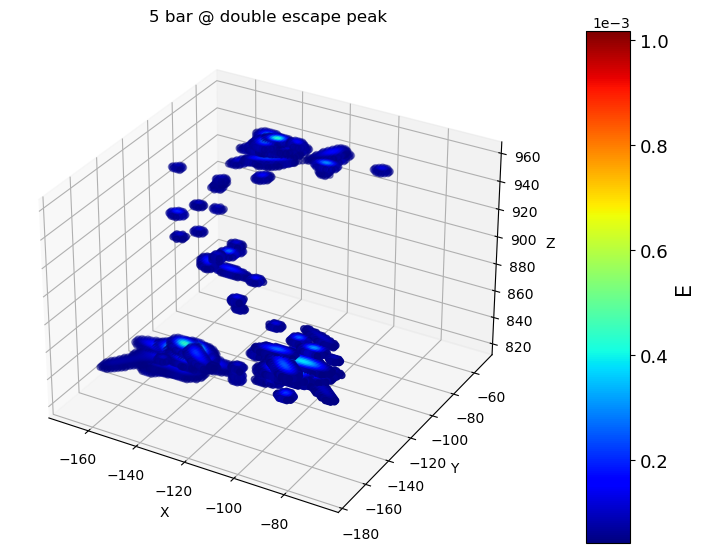

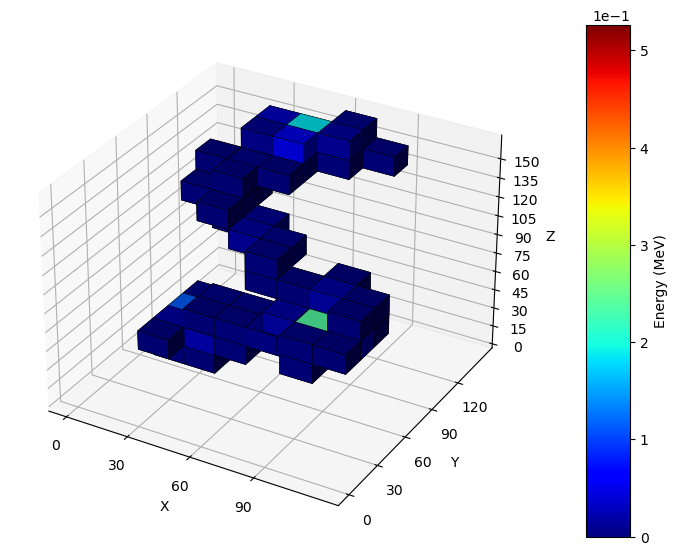

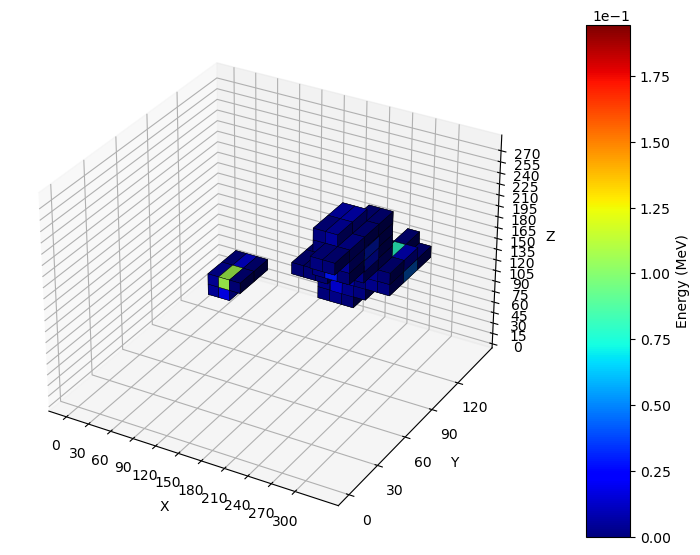

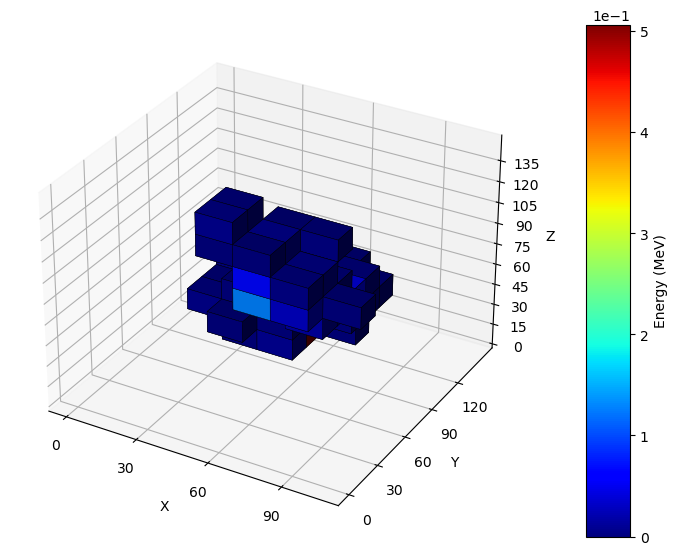

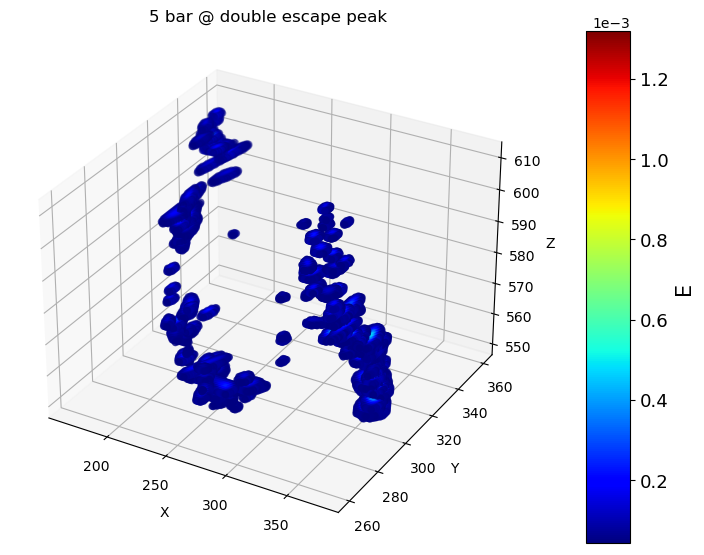

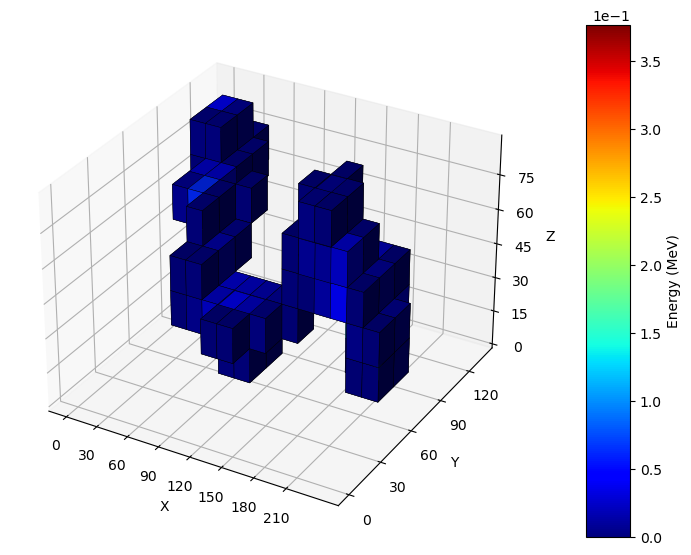

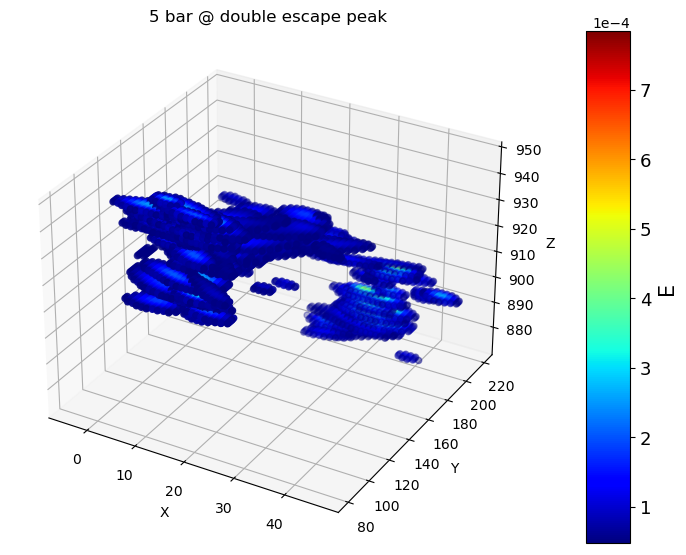

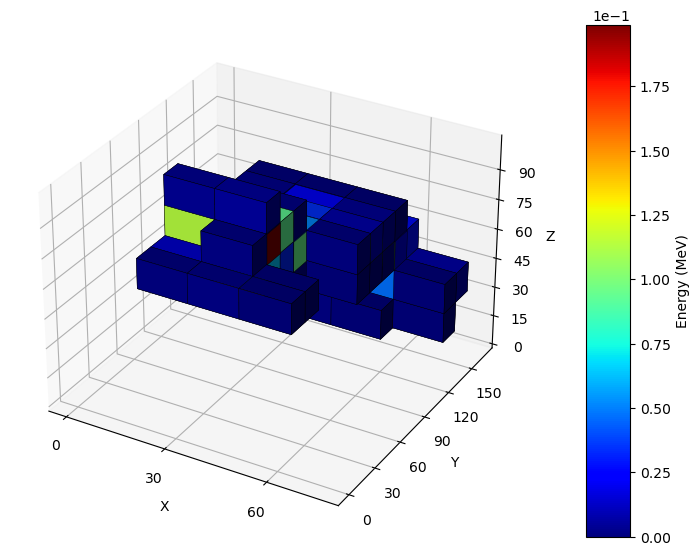

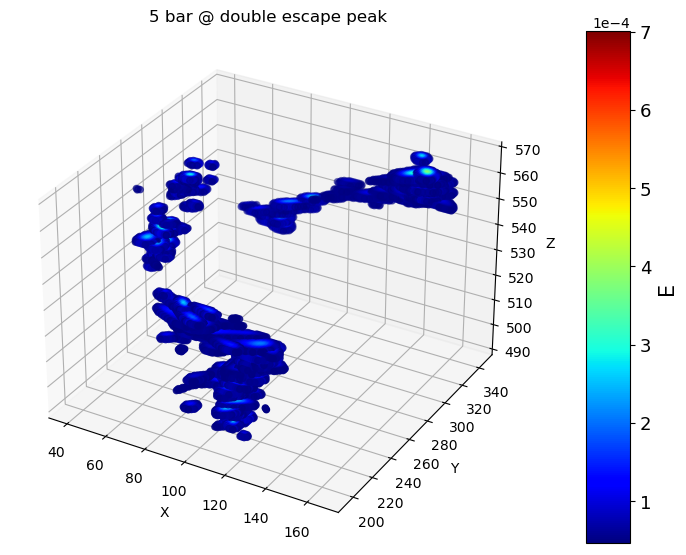

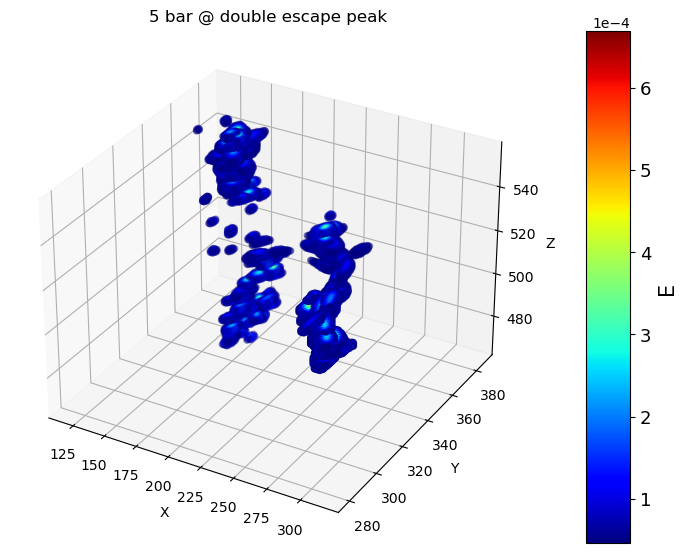

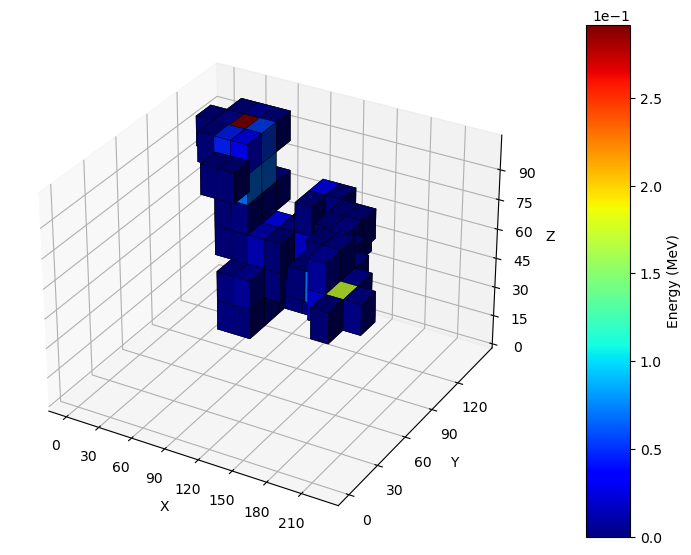

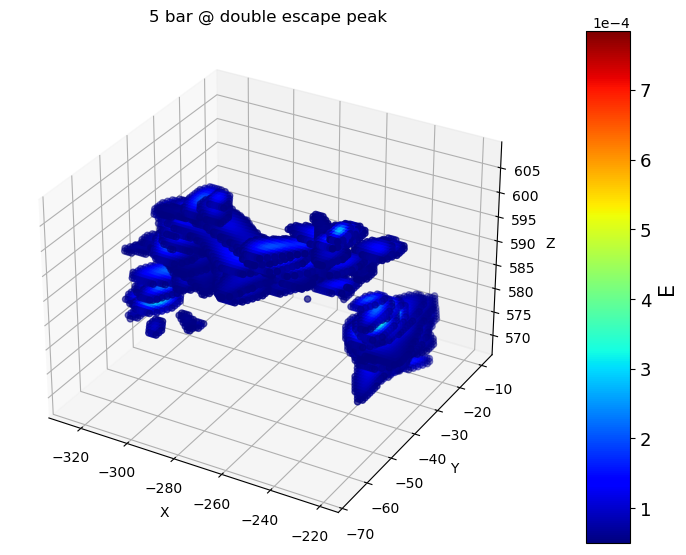

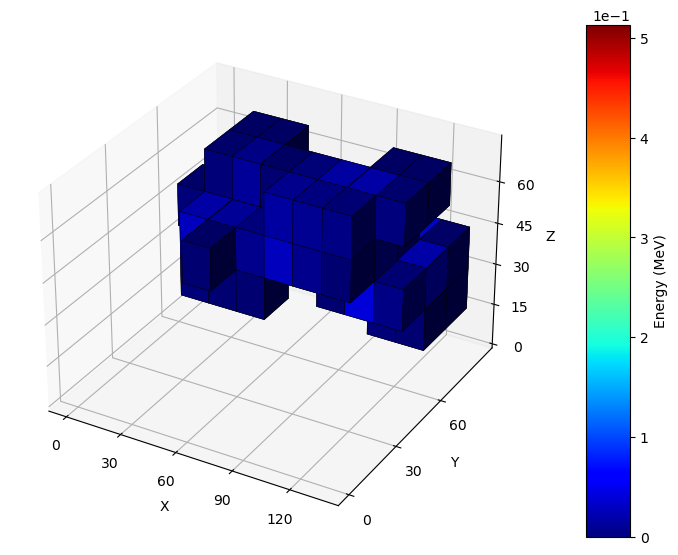

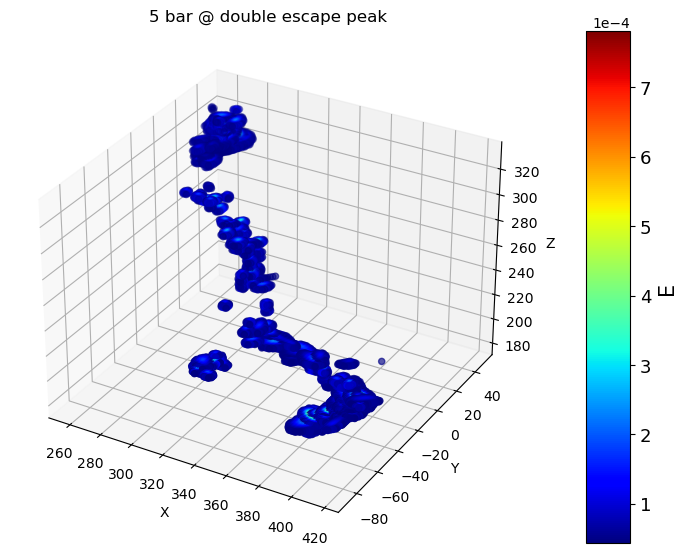

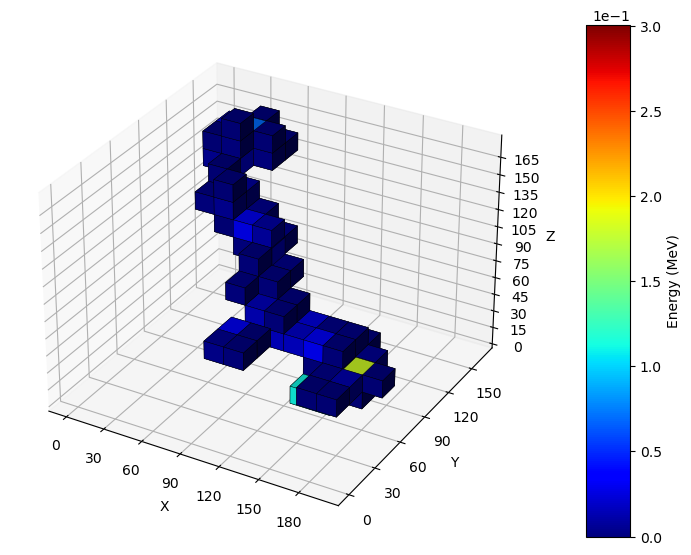

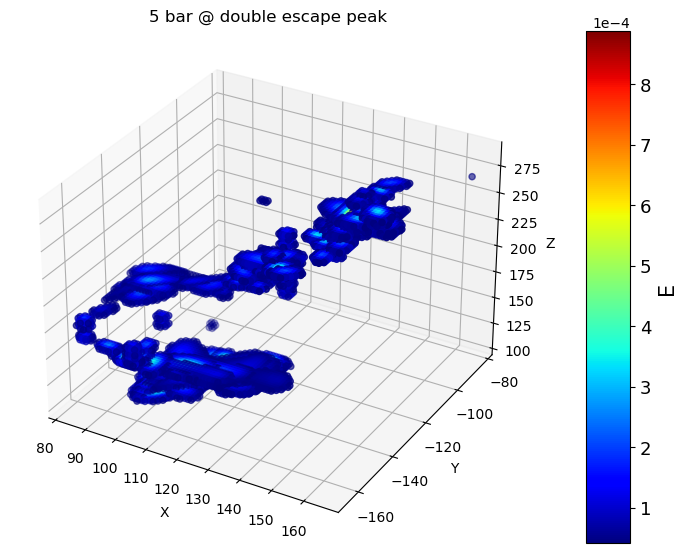

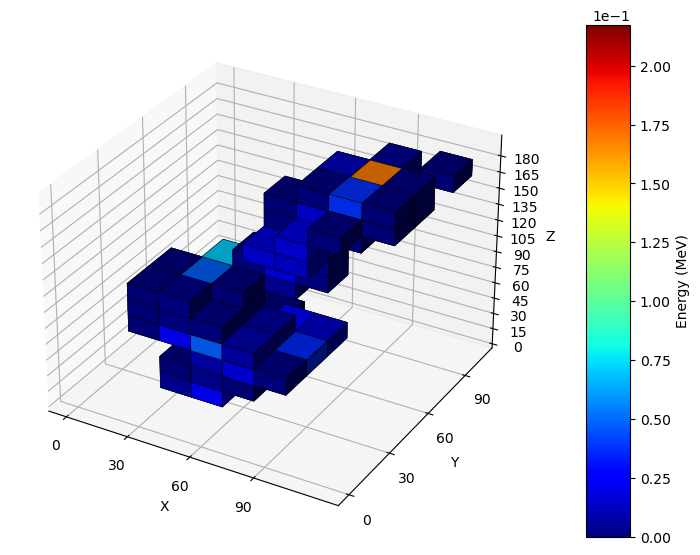

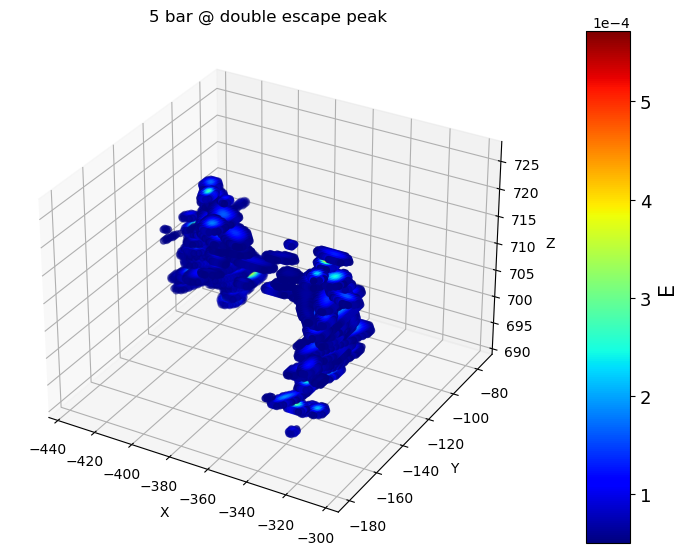

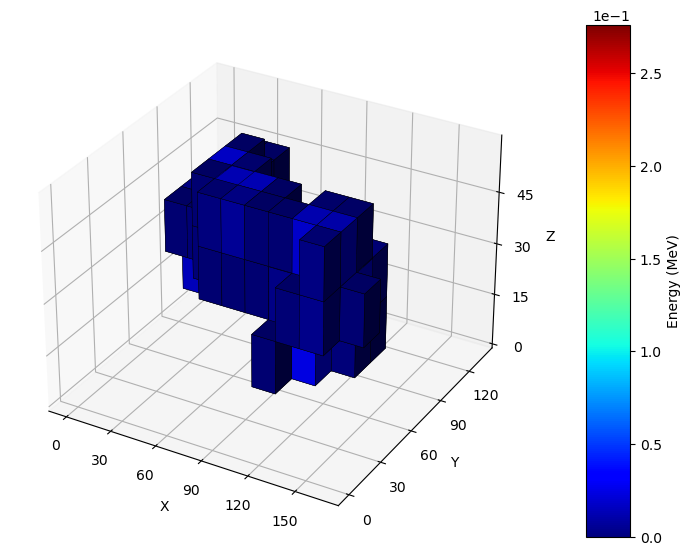

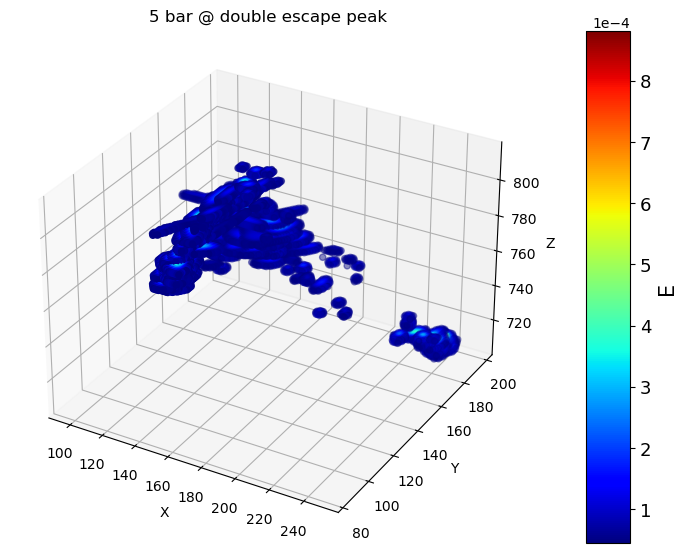

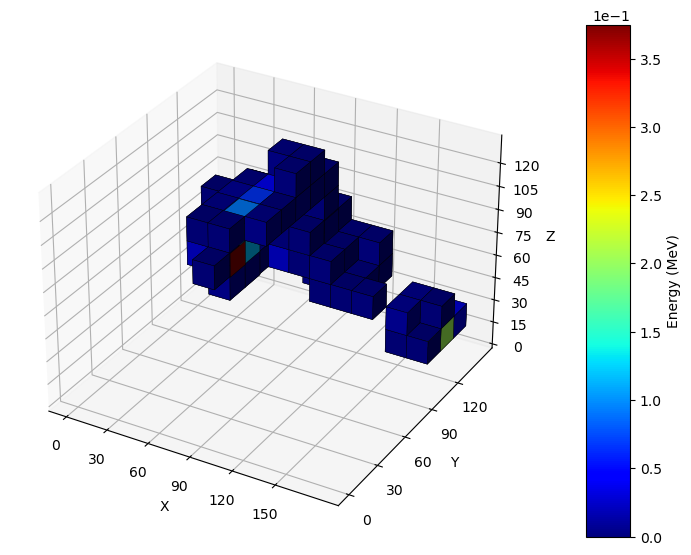

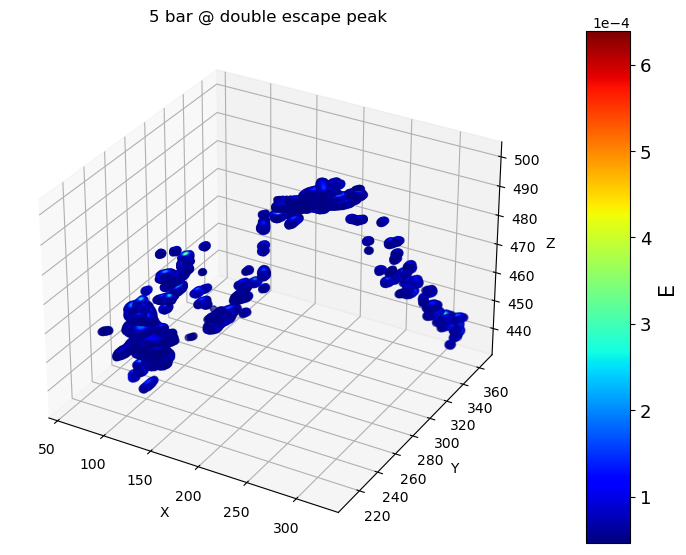

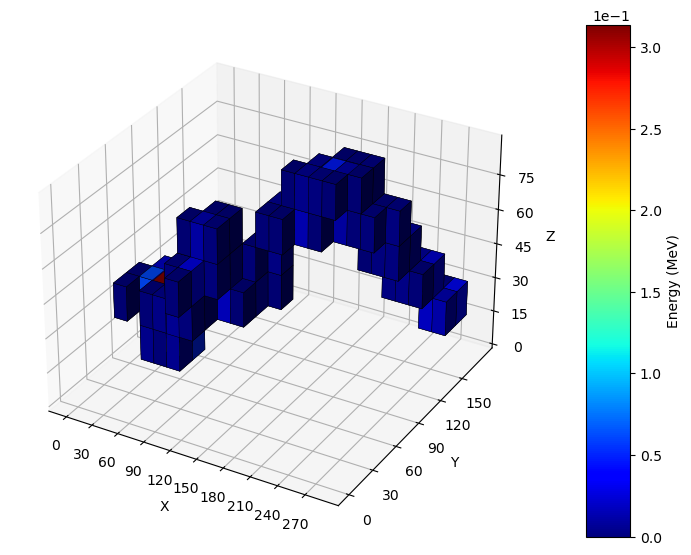

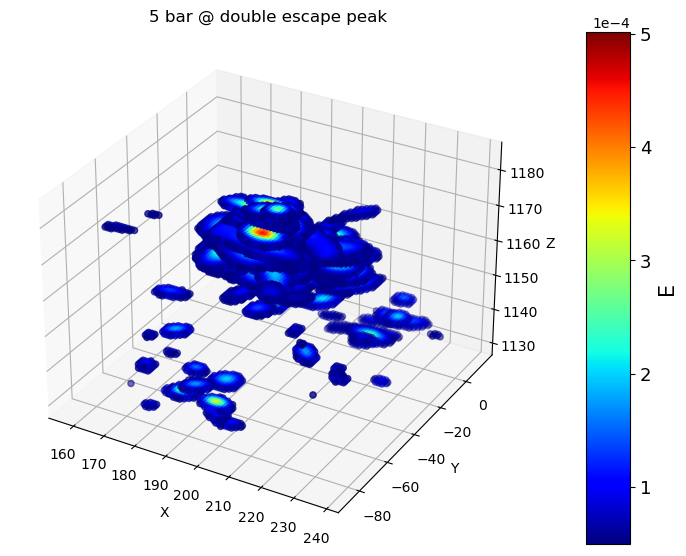

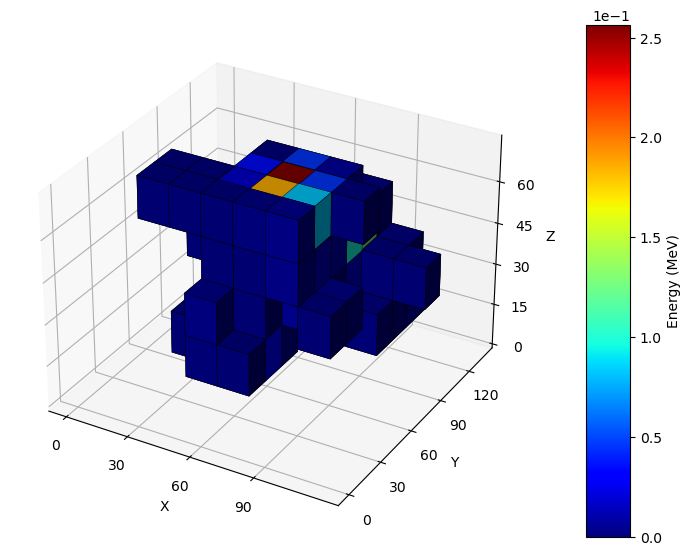

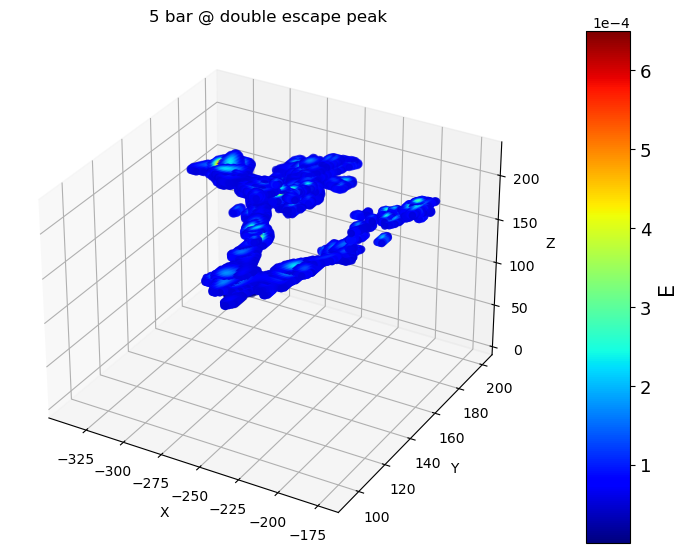

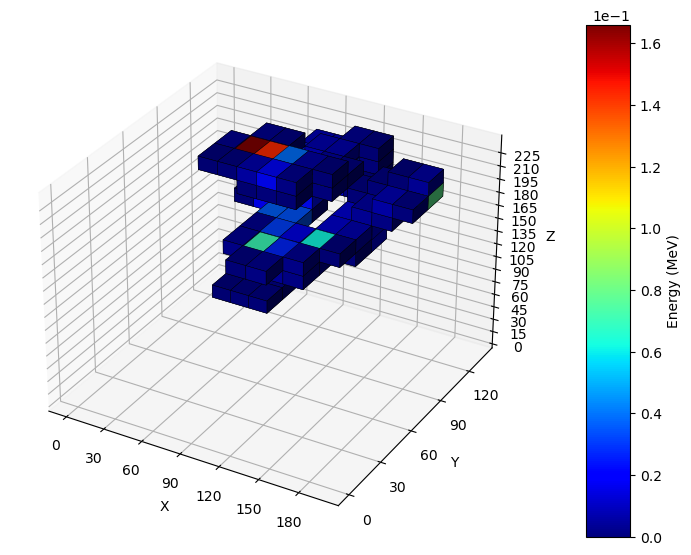

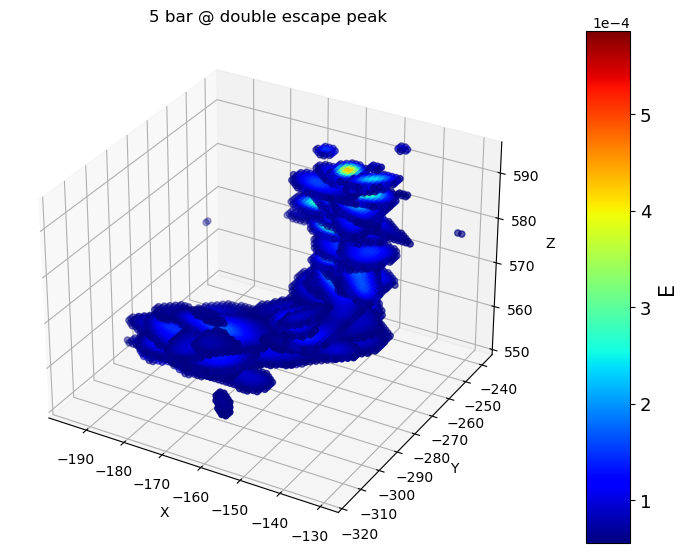

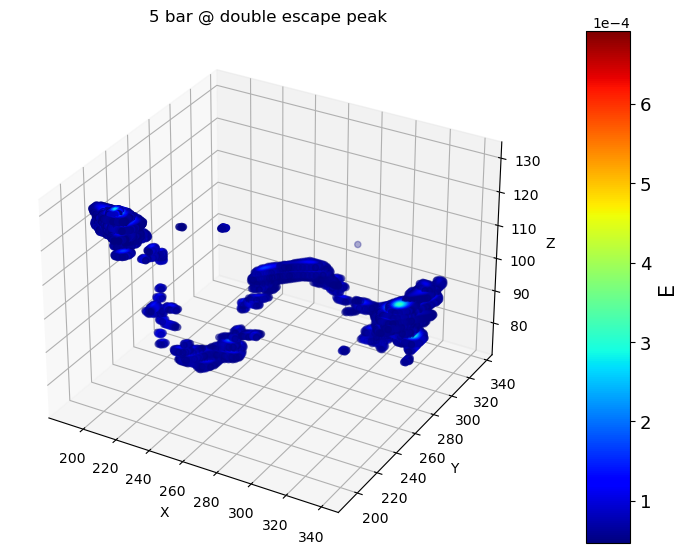

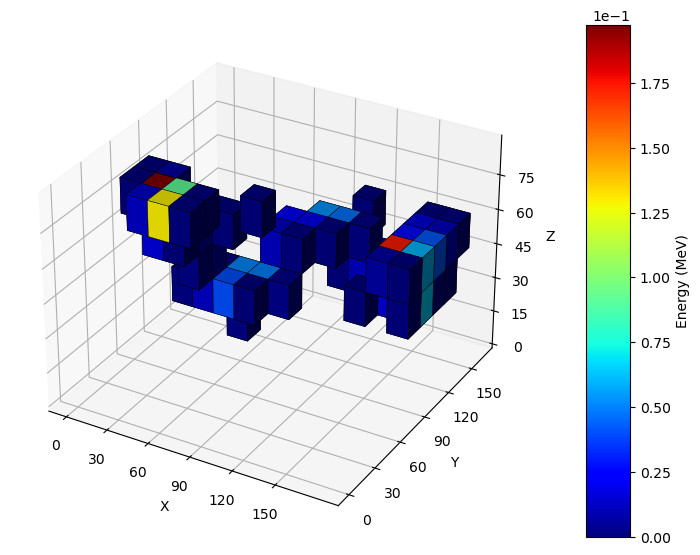

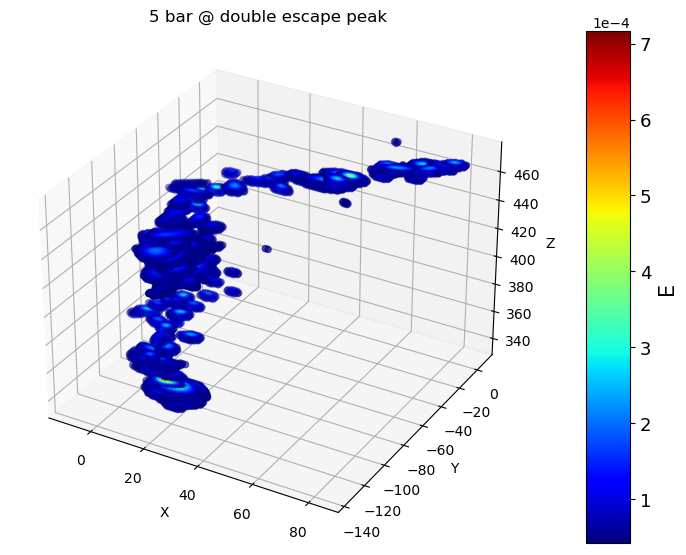

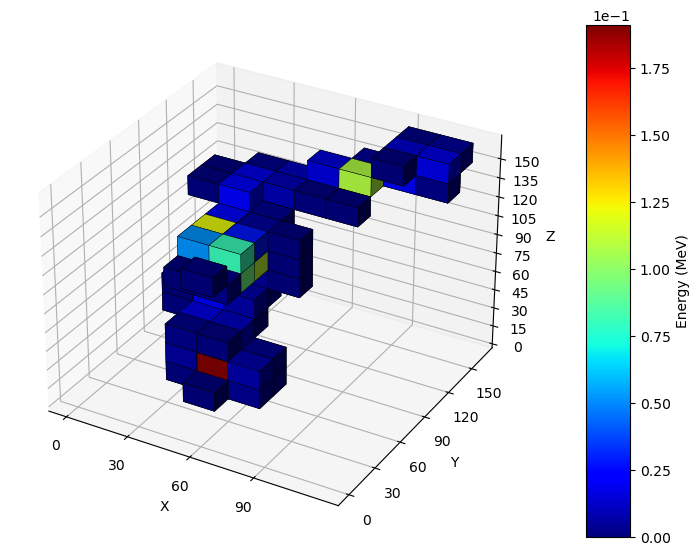

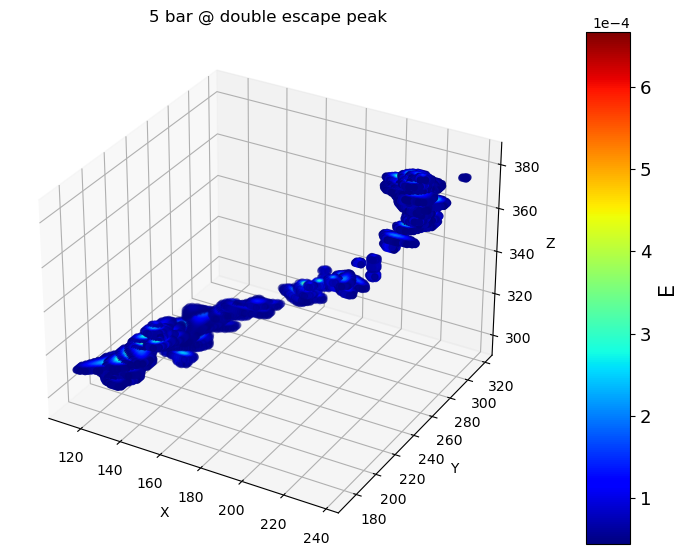

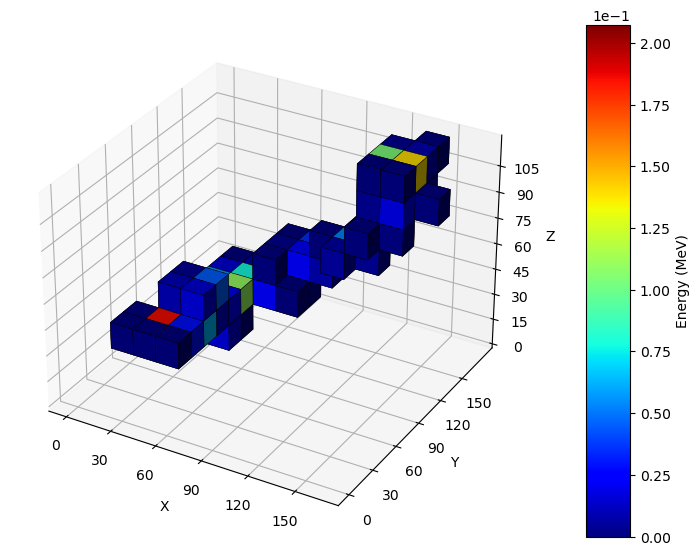

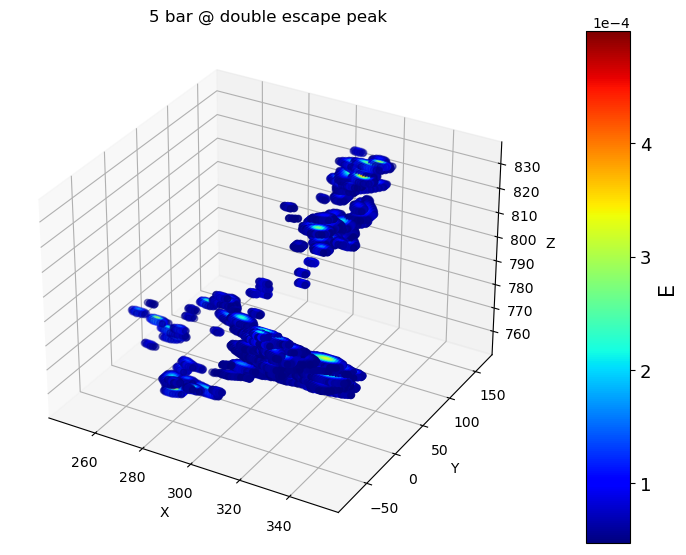

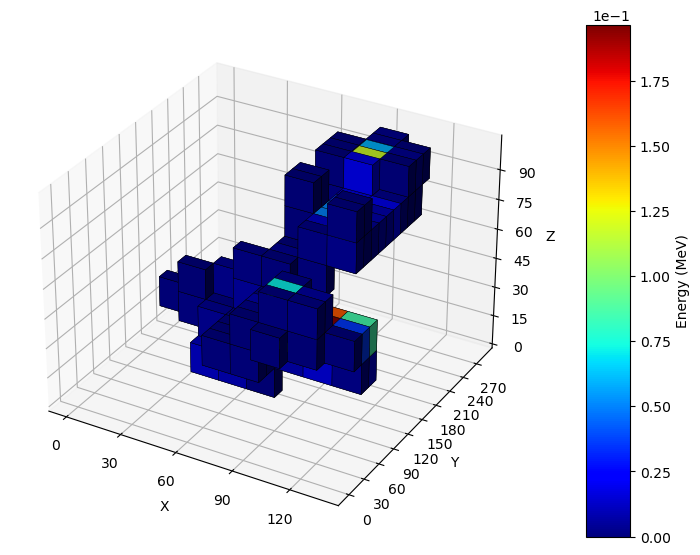

In [44]:
ds_selected_tracks = ds_tracks_5bar_15mm_[(ds_tracks_5bar_15mm_.numb_of_hits > 6100)]
ds_selected_tracks['nfile'] = np.ceil(ds_selected_tracks.event / 20000).astype(int)
bins_info = (-500, 510, 15), (-500, 510, 15), (0, 1310, 15) #(-500, 500, 67), (-500, 500, 67), (0, 1300, 87)
voxel_size = (15, 15, 15)

for i, df in ds_selected_tracks.reset_index(drop = True).iterrows():
    
    beer_path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calib/LPR/208Tl/prod/PORT_1a/prod/beersheba/beersheba_{}_208Tl.h5'.format(df.nfile)
    beer_evs= load_dst(beer_path, 'DECO', 'Events')
    plot_df = beer_evs[beer_evs.event == df.event]
    plot_3d_hits(plot_df, value='E', coords = ['X', 'Y', 'Z'], cmap = mpl.cm.jet, opacity = 1, title = '5 bar @ double escape peak')
    voxels = get_bin_indices(plot_df, bins_info)
    plot_3d_vox(voxels, voxel_size, value='energy', coords = ['xbin', 'ybin', 'zbin'], affluence = (2, 2, 1), th=0, edgecolor='k', linewidth = .3, cmap=mpl.cm.jet, opacity = 1)

    if i == 20:
        break

/scratch/4978440/ipykernel_1224065/1909558253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_selected_tracks['nfile'] = np.ceil(ds_selected_tracks.event / 20000).astype(int)


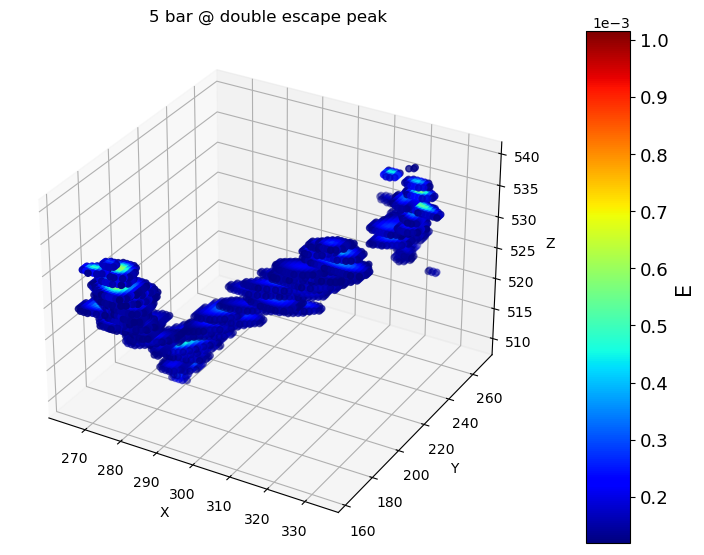

/scratch/4978440/ipykernel_1224065/57226280.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels[0])
/scratch/4978440/ipykernel_1224065/57226280.py:173: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels[1])
/scratch/4978440/ipykernel_1224065/57226280.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(labels[2])


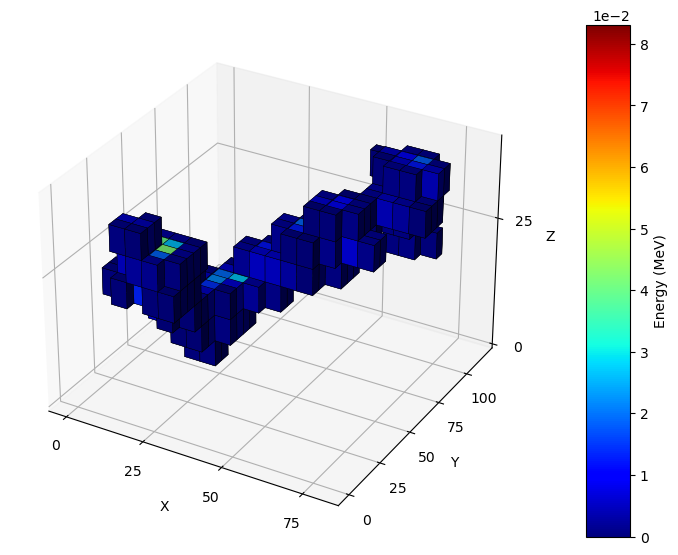

In [40]:
ds_selected_tracks = ds_tracks_13bar_[(ds_tracks_13bar_.numb_of_hits > 6100)]
ds_selected_tracks['nfile'] = np.ceil(ds_selected_tracks.event / 20000).astype(int)
bins_info = (-500, 500, 201), (-500, 500, 201), (0, 1300, 261)
voxel_size = (5, 5, 5)

for i, df in ds_selected_tracks.reset_index(drop = True).iterrows():
    
    beer_path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calibration/208Tl/prod/PORT_1a/prod/beersheba/beersheba_{}_208Tl.h5'.format(df.nfile)
    beer_evs= load_dst(beer_path, 'DECO', 'Events')
    plot_df = beer_evs[beer_evs.event == df.event]
    plot_3d_hits(plot_df, value='E', coords = ['X', 'Y', 'Z'], cmap = mpl.cm.jet, opacity = 1, title = '5 bar @ double escape peak')
    voxels = get_bin_indices(plot_df, bins_info)
    plot_3d_vox(voxels, (5, 5, 5), value='energy', coords = ['xbin', 'ybin', 'zbin'], affluence = (5, 5, 5), th=0, edgecolor='k', linewidth = .3, cmap=mpl.cm.jet, opacity = 1)

    if i == 0:
        break

## MC vs reconstruction spectra

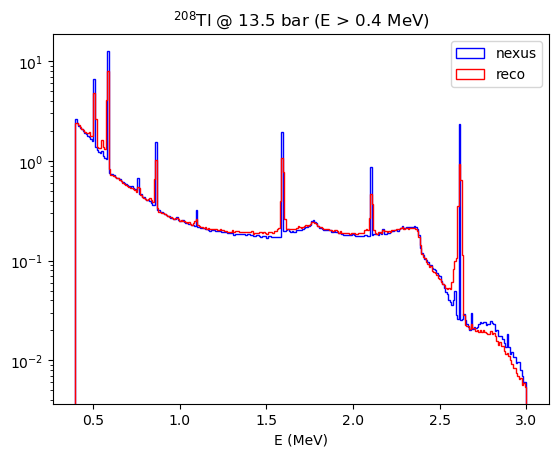

In [41]:
nbins = 300
xrange = (0.4, 3)

b = plt.hist(info_df_208Tl_13bar.tot_ene, nbins, range = xrange, density = True, histtype='step', label = 'nexus', color='b')
b = plt.hist(isa_summary_13bar_.evt_energy, nbins, range = xrange, density = True, histtype='step', label = 'reco', color='r')
plt.yscale('log')
plt.xlabel('E (MeV)')
plt.title(r'$^{208}$Tl @ 13.5 bar (E > 0.4 MeV)')
plt.legend()

## Check event type (ds, pp...)

In [22]:
save_path_gammas_208Tl_5bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calibration_5bar/208Tl/summary_gammas_208Tl.h4'
gamma_part_df_5bar = pd.read_hdf(save_path_gammas_208Tl_5bar, 'gammas_info')

save_path_gammas_208Tl_13bar = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calibration/208Tl/summary_gammas_208Tl.h4'
gamma_part_df_13bar = pd.read_hdf(save_path_gammas_208Tl_13bar, 'gammas_info')

(array([3.85186848e+00, 1.77294458e-01, 2.58423845e-01, 1.80355691e-01,
        1.90365113e-01, 2.27142457e-01, 2.74783729e-01, 3.53777260e-01,
        4.59496105e-01, 5.78015118e-01, 6.86795583e-01, 7.75840611e-01,
        8.45381063e-01, 9.11190192e-01, 9.62062291e-01, 9.51527117e-01,
        9.34669045e-01, 9.05579272e-01, 9.06249524e-01, 8.91625817e-01,
        8.04645467e-01, 1.01863193e+00, 6.90711098e-01, 6.46129674e-01,
        6.13383235e-01, 5.84664711e-01, 5.50179702e-01, 5.30815700e-01,
        5.21018580e-01, 5.33307392e-01, 5.93008318e-01, 1.58655247e+00,
        1.64981296e+00, 1.51597353e+00, 1.43273346e+00, 1.35438378e+00,
        1.29912519e+00, 1.27551819e+00, 1.26377165e+00, 3.21327101e+00,
        9.67457450e-01, 9.42117837e-01, 9.77637766e-01, 1.05366977e+00,
        1.32650841e+00, 6.83759822e+00, 3.97219251e-01, 3.82580528e-01,
        3.78380257e-01, 3.69796343e-01, 3.54787554e-01, 3.38927775e-01,
        3.15461636e-01, 3.02291298e-01, 2.91557051e-01, 2.844223

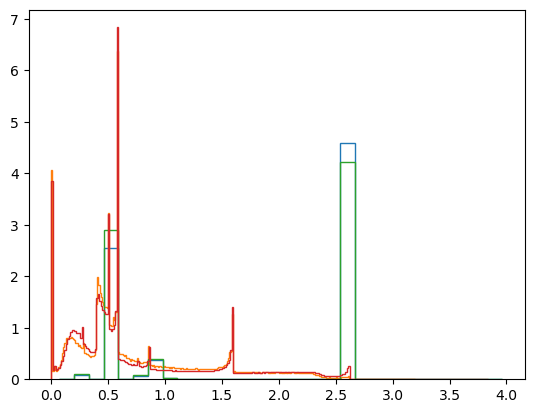

In [25]:
plt.hist(gamma_part_df_5bar.kin_gamma_energy, 30, histtype='step', density = True)
plt.hist(gamma_part_df_5bar.hit_energy, 300, histtype='step', density = True)

plt.hist(gamma_part_df_13bar.kin_gamma_energy, 30, histtype='step', density = True)
plt.hist(gamma_part_df_13bar.hit_energy, 300, histtype='step', density = True)
#plt.yscale('log')

In [8]:
import glob

In [9]:
nexus_path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/HE_calibration_5bar/{isotope}/prod/{port}/nexus/*.h5'

In [10]:
nexus_test = sorted(glob.glob(nexus_path.format(isotope='208Tl', port='*')), key = lambda x: (x.split('/')[-3], int(x.split('_')[-2])))[0]

In [12]:
def get_part_recursive(part_df, out_gammas, all_out_gammas_part = pd.DataFrame()):
    if all_out_gammas_part.empty:
        out_gammas_part = out_gammas[['event_id', 'mother_id']].merge(part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']], on = ['event_id', 'mother_id']).rename(columns = {'mother_id':'gamma_mother_id'})
        all_out_gammas_part = all_out_gammas_part.append(out_gammas_part)
    else:
        out_gammas_part = out_gammas.copy()
    next_out_gammas_part = out_gammas_part[['event_id', 'gamma_mother_id', 'particle_id']].rename(\
                                                                            columns = {'particle_id':'mother_id'}).merge(\
                                                                                                                        part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']], on = ['event_id', 'mother_id']).drop(columns = 'mother_id')
    all_out_gammas_part = all_out_gammas_part.append(next_out_gammas_part)
    if not next_out_gammas_part.empty:
        get_part_recursive(part_df, next_out_gammas_part, all_out_gammas_part)

    all_out_gammas_part = out_gammas.rename(columns = {'mother_id':'gamma_mother_id'}).merge(all_out_gammas_part, on = ['event_id', 'gamma_mother_id'])
    return all_out_gammas_part

In [13]:
def get_gamma_products(file):
    port_name = file.split('/')[-3]
    hit_df = load_dst(file, 'MC', 'hits')
    part_df = load_dst(file, 'MC', 'particles')

    hit_df = hit_df[hit_df.label == 'ACTIVE']

    hit_part_ener = hit_df.groupby(['event_id', 'particle_id']).energy.sum().reset_index().rename(columns = {'energy':'hit_energy'})

    #here we change particle_id to mother_id to merge with the particles df and find the sons of the selected gammas; the other values are changed to identify they come from the gammas
    out_gammas = part_df[(part_df.particle_name == 'gamma') & (part_df.creator_proc == 'RadioactiveDecay')][['event_id', 'particle_id','final_volume', 'kin_energy', 'final_proc']].rename(columns = {'particle_id':'mother_id', 'kin_energy':'kin_gamma_energy', 'final_volume':'final_gamma_volume', 'final_proc':'final_gamma_proc'})

    all_out_gammas_part = get_part_recursive(part_df, out_gammas)

    final_out_gammas_part = all_out_gammas_part.merge(hit_part_ener, on = ['event_id', 'particle_id']).groupby(['event_id', 'gamma_mother_id', 'final_gamma_volume', 'kin_gamma_energy', 'final_gamma_proc']).sum().reset_index().drop(columns = 'particle_id')
    final_out_gammas_part['port'] = port_name
    return final_out_gammas_part

event_id  gamma_mother_id final_gamma_volume  kin_gamma_energy  \
0           0               39             ACTIVE          2.614504   
1           1               29                ICS          2.614504   
2           2               76                ICS          2.614504   
3           3                6             ACTIVE          0.510739   
4           4               28         FIELD_RING          2.614504   
..        ...              ...                ...               ...   
375       322               16             ACTIVE          0.583188   
376       323                6             ACTIVE          0.860554   
377       323               35                ICS          2.614504   
378       324                6             ACTIVE          0.583188   
379       324               34         FIELD_RING          2.614504   

    final_gamma_proc  hit_energy     port  
0               phot    0.544065  PORT_1a  
1               phot    2.198468  PORT_1a  
2               phot    1.206383  PORT_1a  
3               phot    0.493255  PORT_1a  
4               phot    1.141360  PORT_1a  
..               ...         ...      ...  
375             phot    0.583106  PORT_1a  
376             phot    0.293081  PORT_1a  
377             conv    0.000185  PORT_1a  
378             phot    0.169996  PORT_1a  
379             phot    0.479250  PORT_1a  

[380 rows x 7 columns]

In [107]:
nexus_test.split('/')[-3]

'PORT_1a'

In [108]:
final_out_gammas_part['port'] = 'cosa'

In [110]:
final_out_gammas_part

event_id  gamma_mother_id final_gamma_volume  kin_gamma_energy  \
0           0               39             ACTIVE          2.614504   
1           1               29                ICS          2.614504   
2           2               76                ICS          2.614504   
3           3                6             ACTIVE          0.510739   
4           4               28         FIELD_RING          2.614504   
..        ...              ...                ...               ...   
375       322               16             ACTIVE          0.583188   
376       323                6             ACTIVE          0.860554   
377       323               35                ICS          2.614504   
378       324                6             ACTIVE          0.583188   
379       324               34         FIELD_RING          2.614504   

    final_gamma_proc  hit_energy  port  
0               phot    0.544065  cosa  
1               phot    2.198468  cosa  
2               phot    1.206383  cosa  
3               phot    0.493255  cosa  
4               phot    1.141360  cosa  
..               ...         ...   ...  
375             phot    0.583106  cosa  
376             phot    0.293081  cosa  
377             conv    0.000185  cosa  
378             phot    0.169996  cosa  
379             phot    0.479250  cosa  

[380 rows x 7 columns]

(array([23., 24., 24., 20., 27., 57., 53., 18., 17., 13.,  7.,  5.,  6.,
         4.,  8.,  4.,  6., 10., 10.,  3.,  3.,  4.,  6.,  7.,  2., 11.,
         3.,  0.,  2.,  3.]),
 array([4.7220001e-05, 8.6666182e-02, 1.7328514e-01, 2.5990412e-01,
        3.4652308e-01, 4.3314204e-01, 5.1976103e-01, 6.0637999e-01,
        6.9299895e-01, 7.7961791e-01, 8.6623687e-01, 9.5285583e-01,
        1.0394747e+00, 1.1260937e+00, 1.2127128e+00, 1.2993317e+00,
        1.3859507e+00, 1.4725696e+00, 1.5591886e+00, 1.6458075e+00,
        1.7324265e+00, 1.8190454e+00, 1.9056644e+00, 1.9922833e+00,
        2.0789022e+00, 2.1655214e+00, 2.2521403e+00, 2.3387592e+00,
        2.4253781e+00, 2.5119972e+00, 2.5986161e+00], dtype=float32),
 [<matplotlib.patches.Polygon at 0x14d9172bee80>])

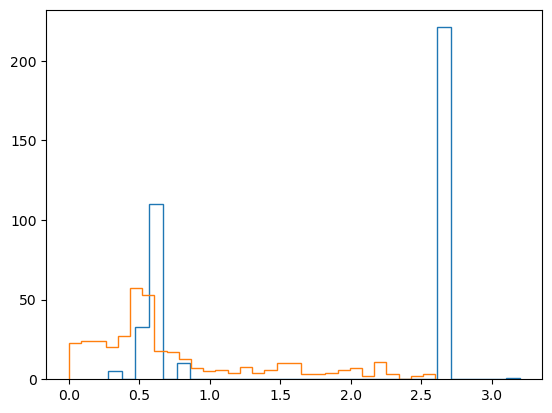

In [100]:
plt.hist(cosa.kin_gamma_energy, 30, histtype='step')
plt.hist(cosa.hit_energy, 30, histtype='step')

In [104]:
cosa[['event_id', 'gamma_mother_id', 'particle_id']].rename(columns = {'particle_id':'mother_id'}).merge(part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']], on = ['event_id', 'mother_id']).drop(columns = 'mother_id')

event_id  gamma_mother_id  particle_id particle_name initial_volume
0            0               16           26            e-            ICS
1            0               16           25            e-            ICS
2            0               28           37            e-     FIELD_RING
3            0               28           36            e-     FIELD_RING
4            0               39           62            e-         ACTIVE
...        ...              ...          ...           ...            ...
4874       324                6           31            e-         ACTIVE
4875       324                6           30            e-         ACTIVE
4876       324                6           29            e-         ACTIVE
4877       324               34           47            e-         ACTIVE
4878       324               34           46            e-         ACTIVE

[4879 rows x 5 columns]

In [95]:
out_gammas[['event_id', 'mother_id']]

event_id  mother_id
7             0         16
26            0         28
37            0         39
66            1          6
78            1         18
...         ...        ...
26194       322         47
26216       323          6
26245       323         35
26308       324          6
26336       324         34

[809 rows x 2 columns]

In [88]:
cosa = out_gammas[['event_id', 'mother_id']].merge(part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']], on = ['event_id', 'mother_id'])
cosa

event_id  mother_id  particle_id particle_name initial_volume
0             0         16           24            e-            ICS
1             0         16           23            e-            ICS
2             0         16           22            e-            ICS
3             0         16           21         gamma            ICS
4             0         16           20            e-            ICS
...         ...        ...          ...           ...            ...
11840       324         34           39            e-         ACTIVE
11841       324         34           38            e-         ACTIVE
11842       324         34           37            e-         ACTIVE
11843       324         34           36            e-     FIELD_RING
11844       324         34           35            e-     FIELD_RING

[11845 rows x 5 columns]

In [92]:
cosa.drop(columns='mother_id').rename(columns = {'particle_id':'mother_id'})[['event_id', 'mother_id']]#.merge(part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']], on = ['event_id', 'mother_id'])

event_id  mother_id
0             0         24
1             0         23
2             0         22
3             0         21
4             0         20
...         ...        ...
11840       324         39
11841       324         38
11842       324         37
11843       324         36
11844       324         35

[11845 rows x 2 columns]

In [67]:
#aqui tenemos por evento las particulas creados con los gammas salientes (out_gammas), la energía de dichos gammas y el proceso con el cual pasaron a ser esas partículas
out_part_from_gammas = part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']].merge(out_gammas, on = ['event_id', 'mother_id'])
out_part_from_gammas

event_id  mother_id  particle_id particle_name initial_volume  \
0             0         16           24            e-            ICS   
1             0         16           23            e-            ICS   
2             0         16           22            e-            ICS   
3             0         16           21         gamma            ICS   
4             0         16           20            e-            ICS   
...         ...        ...          ...           ...            ...   
11840       324         34           39            e-         ACTIVE   
11841       324         34           38            e-         ACTIVE   
11842       324         34           37            e-         ACTIVE   
11843       324         34           36            e-     FIELD_RING   
11844       324         34           35            e-     FIELD_RING   

      final_gamma_volume  kin_gamma_energy final_gamma_proc  
0                    ICS          0.084741             phot  
1                    ICS          0.084741             phot  
2                    ICS          0.084741             phot  
3                    ICS          0.084741             phot  
4                    ICS          0.084741             phot  
...                  ...               ...              ...  
11840         FIELD_RING          2.614504             phot  
11841         FIELD_RING          2.614504             phot  
11842         FIELD_RING          2.614504             phot  
11843         FIELD_RING          2.614504             phot  
11844         FIELD_RING          2.614504             phot  

[11845 rows x 8 columns]

In [84]:

part_df[['event_id', 'mother_id', 'particle_id', 'particle_name', 'initial_volume']].merge(out_part_from_gammas.drop(columns=['mother_id', 'particle_name', 'initial_volume']).rename(columns={'particle_id':'mother_id'}), on = ['event_id', 'mother_id'])





event_id  mother_id  particle_id particle_name initial_volume  \
0            0         21           26            e-            ICS   
1            0         21           25            e-            ICS   
2            0         32           37            e-     FIELD_RING   
3            0         32           36            e-     FIELD_RING   
4            0         47           62            e-         ACTIVE   
...        ...        ...          ...           ...            ...   
4874       324         20           31            e-         ACTIVE   
4875       324         20           30            e-         ACTIVE   
4876       324         20           29            e-         ACTIVE   
4877       324         37           47            e-         ACTIVE   
4878       324         37           46            e-         ACTIVE   

     final_gamma_volume  kin_gamma_energy final_gamma_proc  
0                   ICS          0.084741             phot  
1                   ICS          0.084741             phot  
2            FIELD_RING          0.583188             phot  
3            FIELD_RING          0.583188             phot  
4                ACTIVE          2.614504             phot  
...                 ...               ...              ...  
4874             ACTIVE          0.583188             phot  
4875             ACTIVE          0.583188             phot  
4876             ACTIVE          0.583188             phot  
4877         FIELD_RING          2.614504             phot  
4878         FIELD_RING          2.614504             phot  

[4879 rows x 8 columns]

In [75]:
#merge with the hits energy (only those that left energy in the active ofcourse)
out_part_from_gammas_in_detector = out_part_from_gammas.merge(hit_part_ener, on = ['event_id', 'particle_id'])
out_part_from_gammas_in_detector

event_id  mother_id  particle_id particle_name initial_volume  \
0            0         39           47         gamma         ACTIVE   
1            0         39           46            e-         ACTIVE   
2            0         39           44            e-         ACTIVE   
3            0         39           43            e-         ACTIVE   
4            0         39           42            e-         ACTIVE   
...        ...        ...          ...           ...            ...   
3667       324          6           14            e-         ACTIVE   
3668       324          6           13            e-         ACTIVE   
3669       324         34           39            e-         ACTIVE   
3670       324         34           38            e-         ACTIVE   
3671       324         34           37            e-         ACTIVE   

     final_gamma_volume  kin_gamma_energy final_gamma_proc  hit_energy  
0                ACTIVE          2.614504             phot    0.000221  
1                ACTIVE          2.614504             phot    0.099393  
2                ACTIVE          2.614504             phot    0.000046  
3                ACTIVE          2.614504             phot    0.000021  
4                ACTIVE          2.614504             phot    0.000012  
...                 ...               ...              ...         ...  
3667             ACTIVE          0.583188             phot    0.004886  
3668             ACTIVE          0.583188             phot    0.039920  
3669         FIELD_RING          2.614504             phot    0.000034  
3670         FIELD_RING          2.614504             phot    0.000128  
3671         FIELD_RING          2.614504             phot    0.441807  

[3672 rows x 9 columns]

In [80]:
out_part_from_gammas_in_detector.groupby(['event_id', 'mother_id', 'final_gamma_volume', 'kin_gamma_energy', 'final_gamma_proc']).sum().reset_index().drop(columns='particle_id')

event_id  mother_id final_gamma_volume  kin_gamma_energy  \
0           0         39             ACTIVE          2.614504   
1           1         29                ICS          2.614504   
2           2         76                ICS          2.614504   
3           3          6             ACTIVE          0.510739   
4           4         28         FIELD_RING          2.614504   
..        ...        ...                ...               ...   
357       321         25             ACTIVE          2.614504   
358       322         16             ACTIVE          0.583188   
359       323          6             ACTIVE          0.860554   
360       324          6             ACTIVE          0.583188   
361       324         34         FIELD_RING          2.614504   

    final_gamma_proc  hit_energy  
0               phot    0.509740  
1               phot    2.037200  
2               phot    0.856042  
3               phot    0.418894  
4               phot    1.031313  
..               ...         ...  
357             phot    0.291695  
358             phot    0.496089  
359             phot    0.237571  
360             phot    0.165575  
361             phot    0.441969  

[362 rows x 6 columns]

In [83]:
part_df[(part_df.particle_name == 'gamma') & (part_df.creator_proc == 'RadioactiveDecay')].creator_proc.

7        RadioactiveDecay
26       RadioactiveDecay
37       RadioactiveDecay
66       RadioactiveDecay
78       RadioactiveDecay
               ...       
26194    RadioactiveDecay
26216    RadioactiveDecay
26245    RadioactiveDecay
26308    RadioactiveDecay
26336    RadioactiveDecay
Name: creator_proc, Length: 809, dtype: object

(array([181., 130.,  13.,   1.]),
 array([2., 3., 4., 5., 6.]),
 <BarContainer object of 4 artists>)

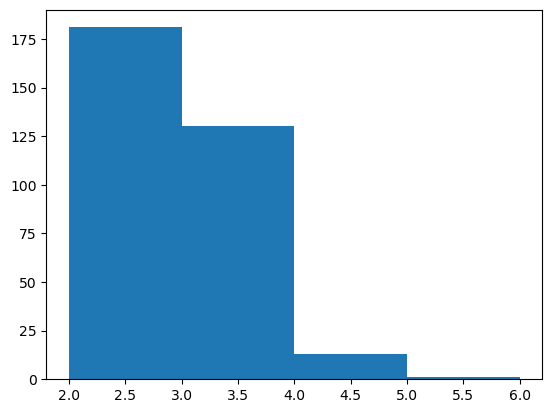

In [70]:
plt.hist(part_df[(part_df.particle_name == 'gamma') & (part_df.creator_proc == 'RadioactiveDecay')].groupby('event_id').count().final_y, 4, range = (2, 6))

(array([ 34.,   0.,  27.,   0.,  95., 291.,   0.,   5.,  31.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 324.,   0.,   0.,   0.,   0.,   1.]),
 array([0.01044528, 0.11668659, 0.2229279 , 0.3291692 , 0.4354105 ,
        0.54165184, 0.64789313, 0.7541344 , 0.86037576, 0.96661705,
        1.0728583 , 1.1790997 , 1.285341  , 1.3915823 , 1.4978236 ,
        1.604065  , 1.7103062 , 1.8165475 , 1.9227889 , 2.02903   ,
        2.1352715 , 2.2415128 , 2.347754  , 2.4539955 , 2.5602367 ,
        2.666478  , 2.7727194 , 2.8789606 , 2.9852018 , 3.0914433 ,
        3.1976845 ], dtype=float32),
 <BarContainer object of 30 artists>)

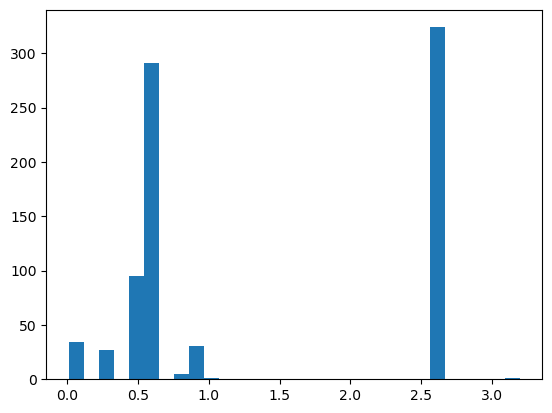

In [57]:
plt.hist(part_df[(part_df.particle_name == 'gamma') & (part_df.creator_proc == 'RadioactiveDecay')].kin_energy, 30)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a = [0.1444, 0.0657, 0.1721]
b = [0.073, 0.0098, 0.02]
E = [1.592, 2.103, 2.615]

In [8]:
np.array(a) /np.array(b)

array([1.97808219, 6.70408163, 8.605     ])

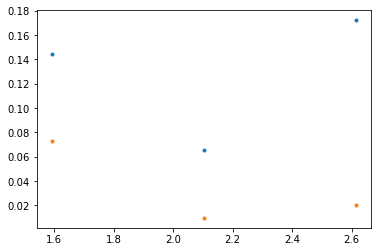

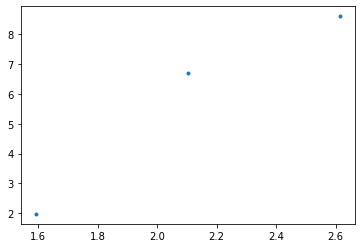

In [9]:
plt.plot(E, a, '.', label = '13.5 bar')
plt.plot(E, b, '.', label = '5 bar')
plt.show()
plt.plot(E, np.array(a) /np.array(b), '.')